In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [3]:
module_url = "./universal-sentence-encoder_4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
#Bert Models
from sentence_transformers import SentenceTransformer,util
tmodel = SentenceTransformer('stsb-roberta-large')
tmodel2 = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

module ./universal-sentence-encoder_4 loaded


In [4]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

Sentence =  nuclears theory  3D structure cube added or removed atoms  ; similarity =  0.4263895
Sentence =  Because of count of elements. Mostly about carbon dioxide. ; similarity =  0.18421729
Sentence =  Allotrops such as diamond and graphit they have the same chemical composition but they have a different type of crystal structures. ; similarity =  0.5127956
Sentence =  this name is izonom or isonome this caused from difference connection type of atoms and if is it dipol. ; similarity =  0.117975526
Sentence =  because of elements energy and pyhsical features has different reaction for every composition ; similarity =  0.27120373
Sentence =  for example water  and ice. both materials are same chemical composition =H2O but physical features are compelety different.and there is bağ .and  this determine  ice or water but i couldnt remember.the diffrence is heat   ; similarity =  0.15899469
Sentence =  Weather and temparature. Because fruit flies' genetics are easily effected affected 

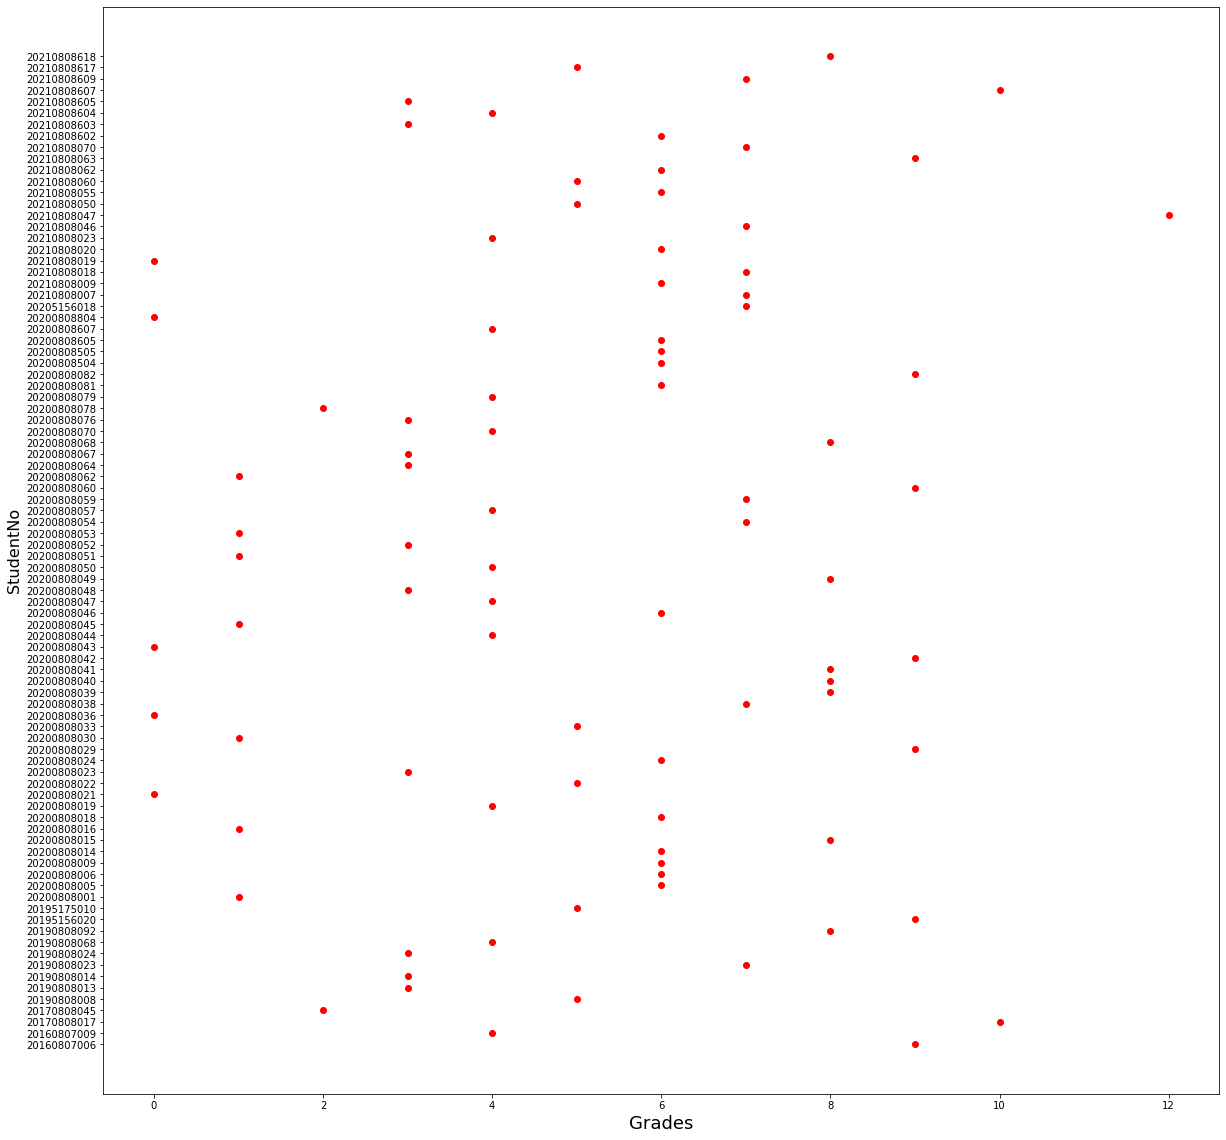

Number:    Encoder:    Original
20160807006 9 20
20160807009 4 0
20170808017 10 20
20170808045 2 12
20190808008 5 0
20190808013 3 0
20190808014 3 0
20190808023 7 12
20190808024 3 0
20190808068 4 0
20190808092 8 0
20195156020 9 20
20195175010 5 12
20200808001 1 0
20200808005 6 20
20200808006 6 5
20200808009 6 12
20200808014 6 0
20200808015 8 5
20200808016 1 0
20200808018 6 12
20200808019 4 0
20200808021 0 0
20200808022 5 0
20200808023 3 0
20200808024 6 0
20200808029 9 5
20200808030 1 0
20200808033 5 0
20200808036 0 0
20200808038 7 0
20200808039 8 17
20200808040 8 17
20200808041 8 0
20200808042 9 20
20200808043 0 0
20200808044 4 0
20200808045 1 0
20200808046 6 5
20200808047 4 0
20200808048 3 0
20200808049 8 12
20200808050 4 0
20200808051 1 0
20200808052 3 0
20200808053 1 0
20200808054 7 0
20200808057 4 12
20200808059 7 20
20200808060 9 17
20200808062 1 0
20200808064 3 12
20200808067 3 0
20200808068 8 20
20200808070 4 0
20200808076 3 0
20200808078 2 0
20200808079 4 0
20200808081 6 0
20200

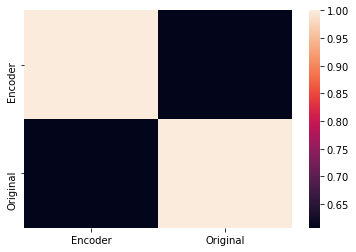

In [5]:
examQ1 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q1')
examQ1.fillna('', inplace=True)
examQ1.head()
answersQ1 = examQ1.iloc[:,2].values.tolist()
originalgrades = examQ1.iloc[:,5].values.tolist()
sentence_embeddings = model(answersQ1)
query = 'Due to internal crystal structure of the molecules.'
query_vec = model([query])[0]
data = []



studentnoq1 = examQ1.iloc[:,0].values.tolist()
stno = []

for no in studentnoq1:
  stno.append(str(no))


for sent in answersQ1:
  sim = cosine(query_vec, model([sent])[0])
  grade = sim*20
  if grade<0:
    grade = 0    
  data.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim)

plt.figure(figsize=(20,20))
plt.plot(data, stno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

gradesdf = pd.DataFrame({'Encoder':data,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(gradesdf)) :
  print(stno[i],gradesdf.loc[i, "Encoder"], gradesdf.loc[i, "Original"])
print(gradesdf.corr())

sns.heatmap(gradesdf.corr())
#R-Squared
r2 = r2_score(originalgrades,data)
print("R2: ",r2)
print("T-Test Result: ",stats.ttest_ind(originalgrades,data))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(gradesdf)


**Roberta Large**

Sentence =  nuclears theory  3D structure cube added or removed atoms  ; similarity =  0.42075893
Sentence =  Because of count of elements. Mostly about carbon dioxide. ; similarity =  0.34954807
Sentence =  Allotrops such as diamond and graphit they have the same chemical composition but they have a different type of crystal structures. ; similarity =  0.51367325
Sentence =  this name is izonom or isonome this caused from difference connection type of atoms and if is it dipol. ; similarity =  0.47821745
Sentence =  because of elements energy and pyhsical features has different reaction for every composition ; similarity =  0.33091414
Sentence =  for example water  and ice. both materials are same chemical composition =H2O but physical features are compelety different.and there is bağ .and  this determine  ice or water but i couldnt remember.the diffrence is heat   ; similarity =  0.3075759
Sentence =  Weather and temparature. Because fruit flies' genetics are easily effected affected 

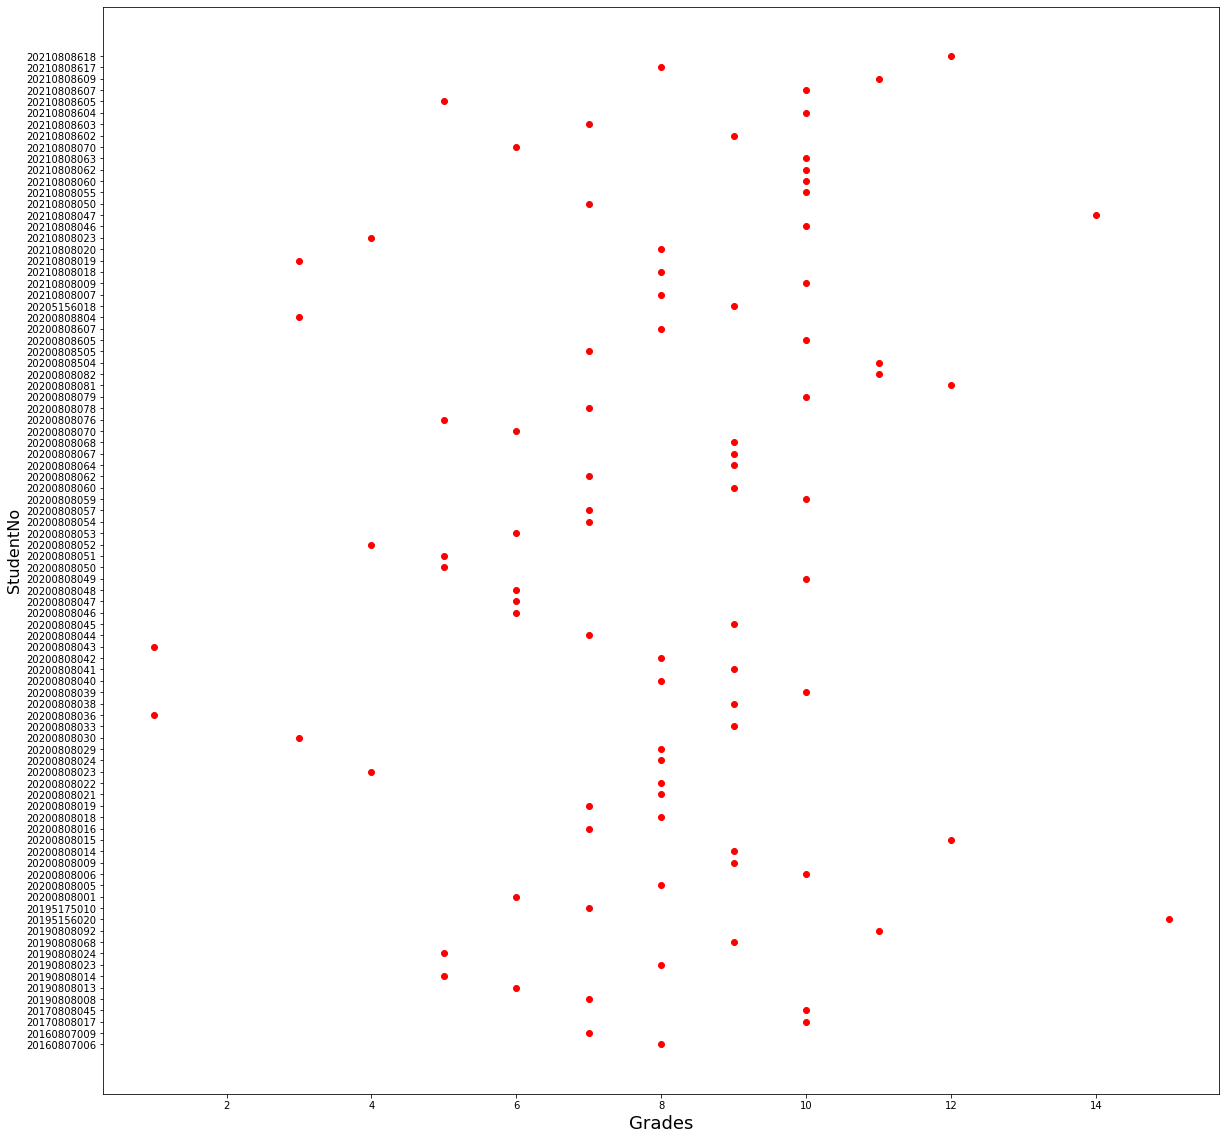

Number:    Encoder:    Original
20160807006 8 20
20160807009 7 0
20170808017 10 20
20170808045 10 12
20190808008 7 0
20190808013 6 0
20190808014 5 0
20190808023 8 12
20190808024 5 0
20190808068 9 0
20190808092 11 0
20195156020 15 20
20195175010 7 12
20200808001 6 0
20200808005 8 20
20200808006 10 5
20200808009 9 12
20200808014 9 0
20200808015 12 5
20200808016 7 0
20200808018 8 12
20200808019 7 0
20200808021 8 0
20200808022 8 0
20200808023 4 0
20200808024 8 0
20200808029 8 5
20200808030 3 0
20200808033 9 0
20200808036 1 0
20200808038 9 0
20200808039 10 17
20200808040 8 17
20200808041 9 0
20200808042 8 20
20200808043 1 0
20200808044 7 0
20200808045 9 0
20200808046 6 5
20200808047 6 0
20200808048 6 0
20200808049 10 12
20200808050 5 0
20200808051 5 0
20200808052 4 0
20200808053 6 0
20200808054 7 0
20200808057 7 12
20200808059 10 20
20200808060 9 17
20200808062 7 0
20200808064 9 12
20200808067 9 0
20200808068 9 20
20200808070 6 0
20200808076 5 0
20200808078 7 0
20200808079 10 0
20200808081 

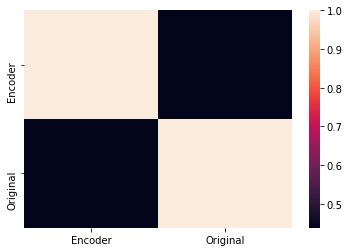

In [6]:
examQ1 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q1')
examQ1.fillna('', inplace=True)
examQ1.head()
answersQ1 = examQ1.iloc[:,2].values.tolist()
originalgrades = examQ1.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery = 'Due to internal crystal structure of the molecules.'
tquery_vec = tmodel.encode(([tquery])[0])
tdata = []



tstudentnoq1 = examQ1.iloc[:,0].values.tolist()
tstno = []

for no in tstudentnoq1:
  tstno.append(str(no))


for sent in answersQ1:
  tsim = cosine(tquery_vec, tmodel.encode(([sent])[0]))
  tgrade = tsim*20
  if tgrade<0:
    tgrade = 0    
  tdata.append(round(tgrade))
  print("Sentence = ", sent, "; similarity = ", tsim)

plt.figure(figsize=(20,20))
plt.plot(tdata, tstno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

tgradesdf = pd.DataFrame({'Encoder':tdata,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf)) :
  print(tstno[i],tgradesdf.loc[i, "Encoder"], tgradesdf.loc[i, "Original"])
print(tgradesdf.corr())

sns.heatmap(tgradesdf.corr())
#R-Squared
tr2 = r2_score(originalgrades,tdata)
print("R2: ",tr2)
print("T-Test Result: ",stats.ttest_ind(originalgrades,tdata))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf)


**Bert Base Nli**

Sentence =  nuclears theory  3D structure cube added or removed atoms  ; similarity =  0.5429282
Sentence =  Because of count of elements. Mostly about carbon dioxide. ; similarity =  0.49399105
Sentence =  Allotrops such as diamond and graphit they have the same chemical composition but they have a different type of crystal structures. ; similarity =  0.59578425
Sentence =  this name is izonom or isonome this caused from difference connection type of atoms and if is it dipol. ; similarity =  0.6403711
Sentence =  because of elements energy and pyhsical features has different reaction for every composition ; similarity =  0.49101248
Sentence =  for example water  and ice. both materials are same chemical composition =H2O but physical features are compelety different.and there is bağ .and  this determine  ice or water but i couldnt remember.the diffrence is heat   ; similarity =  0.41671398
Sentence =  Weather and temparature. Because fruit flies' genetics are easily effected affected b

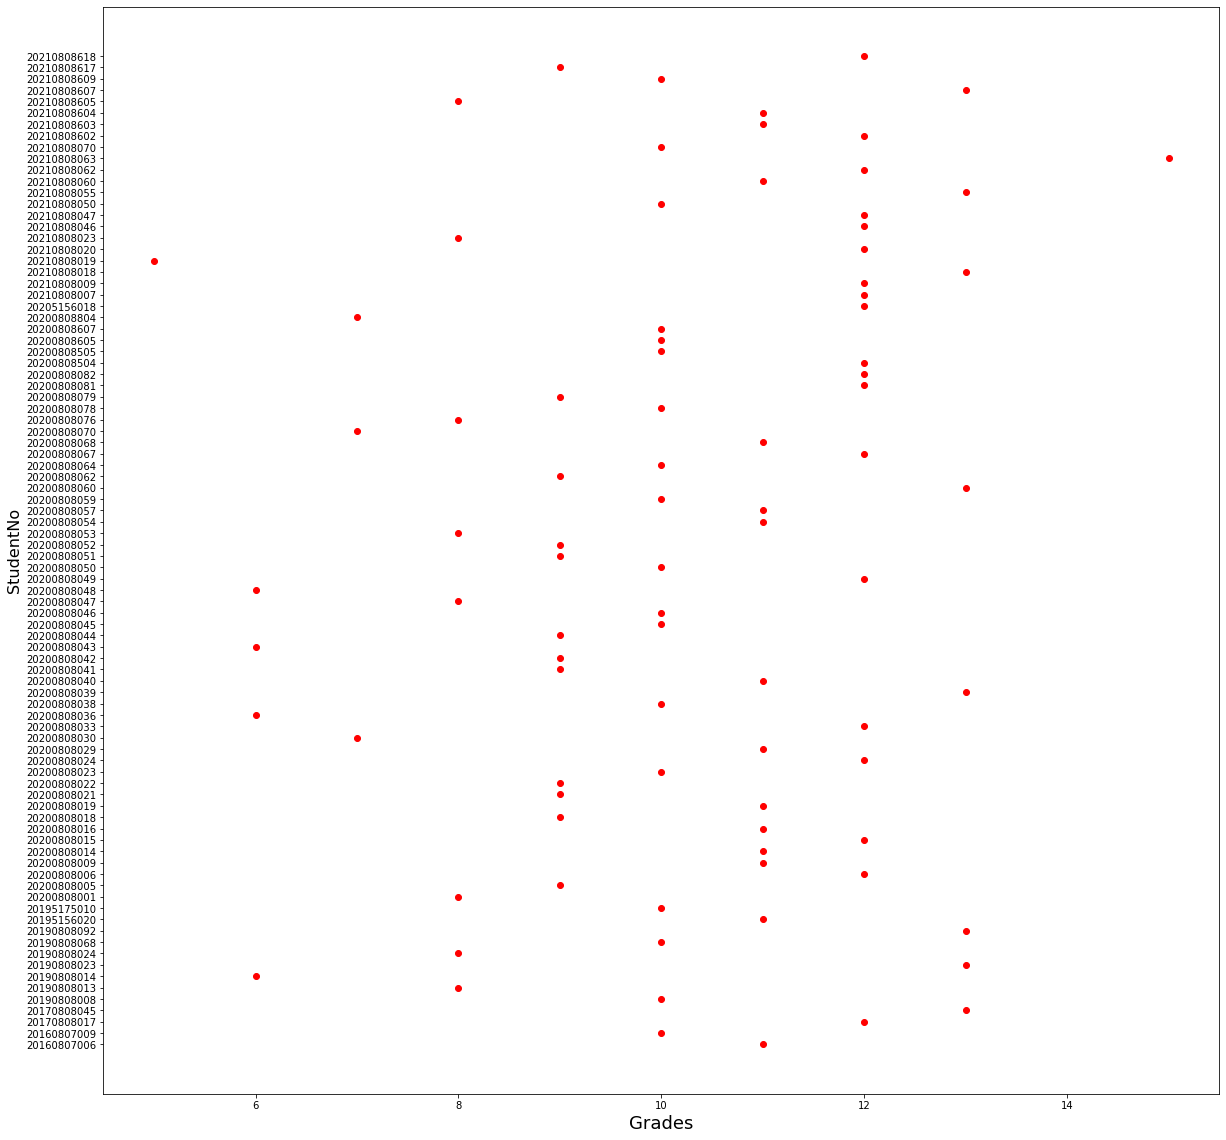

Number:    Encoder:    Original
20160807006 11 20
20160807009 10 0
20170808017 12 20
20170808045 13 12
20190808008 10 0
20190808013 8 0
20190808014 6 0
20190808023 13 12
20190808024 8 0
20190808068 10 0
20190808092 13 0
20195156020 11 20
20195175010 10 12
20200808001 8 0
20200808005 9 20
20200808006 12 5
20200808009 11 12
20200808014 11 0
20200808015 12 5
20200808016 11 0
20200808018 9 12
20200808019 11 0
20200808021 9 0
20200808022 9 0
20200808023 10 0
20200808024 12 0
20200808029 11 5
20200808030 7 0
20200808033 12 0
20200808036 6 0
20200808038 10 0
20200808039 13 17
20200808040 11 17
20200808041 9 0
20200808042 9 20
20200808043 6 0
20200808044 9 0
20200808045 10 0
20200808046 10 5
20200808047 8 0
20200808048 6 0
20200808049 12 12
20200808050 10 0
20200808051 9 0
20200808052 9 0
20200808053 8 0
20200808054 11 0
20200808057 11 12
20200808059 10 20
20200808060 13 17
20200808062 9 0
20200808064 10 12
20200808067 12 0
20200808068 11 20
20200808070 7 0
20200808076 8 0
20200808078 10 0
202

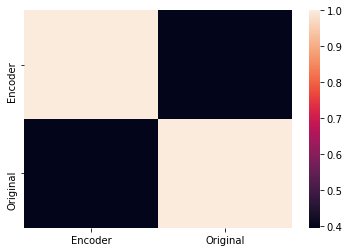

In [7]:
examQ1 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q1')
examQ1.fillna('', inplace=True)
examQ1.head()
answersQ1 = examQ1.iloc[:,2].values.tolist()
originalgrades = examQ1.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query = 'Due to internal crystal structure of the molecules.'
t2query_vec = tmodel2.encode(([t2query])[0])
t2data = []



t2studentnoq1 = examQ1.iloc[:,0].values.tolist()
t2stno = []

for no in t2studentnoq1:
  t2stno.append(str(no))


for sent in answersQ1:
  t2sim = cosine(t2query_vec, tmodel2.encode(([sent])[0]))
  t2grade = t2sim*20
  if t2grade<0:
    t2grade = 0    
  t2data.append(round(t2grade))
  print("Sentence = ", sent, "; similarity = ", t2sim)

plt.figure(figsize=(20,20))
plt.plot(t2data, t2stno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

t2gradesdf = pd.DataFrame({'Encoder':t2data,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf)) :
  print(t2stno[i],t2gradesdf.loc[i, "Encoder"], t2gradesdf.loc[i, "Original"])
print(t2gradesdf.corr())

sns.heatmap(t2gradesdf.corr())
#R-Squared
t2r2 = r2_score(originalgrades,t2data)
print("R2: ",t2r2)
print("T-Test Result: ",stats.ttest_ind(originalgrades,t2data))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf)


**Q2**

Sentence =  Because ,volume,weight, size calculasion in the air more easy ; similarity =  0.12534976
Sentence =  It allowed that measurement of gas with Analytical Balance. Weight, volume, pressure and templature was quantifiable now. ; similarity =  0.49234742
Sentence =  Observing gases are more easy than the others . Also with the barometer and such tools we can measure its volume , pressure and the output of some reactions volume . Basically gases are more effective than the others.
 ; similarity =  0.68224937
Sentence =  because of the easly working on gases. they can expand or change the volume. they doing a vacuum tube in the liquid when some reactions occured they can observe with liqud volume in tube. ; similarity =  0.38379535
Sentence =  because its easy to calculate the everything and this time gas is important ; similarity =  0.33592692
Sentence =  P.V=n.R.T   with this formula we can figure out gases exacly .gases are pressable.and heat effects it. and gases have P.  whic

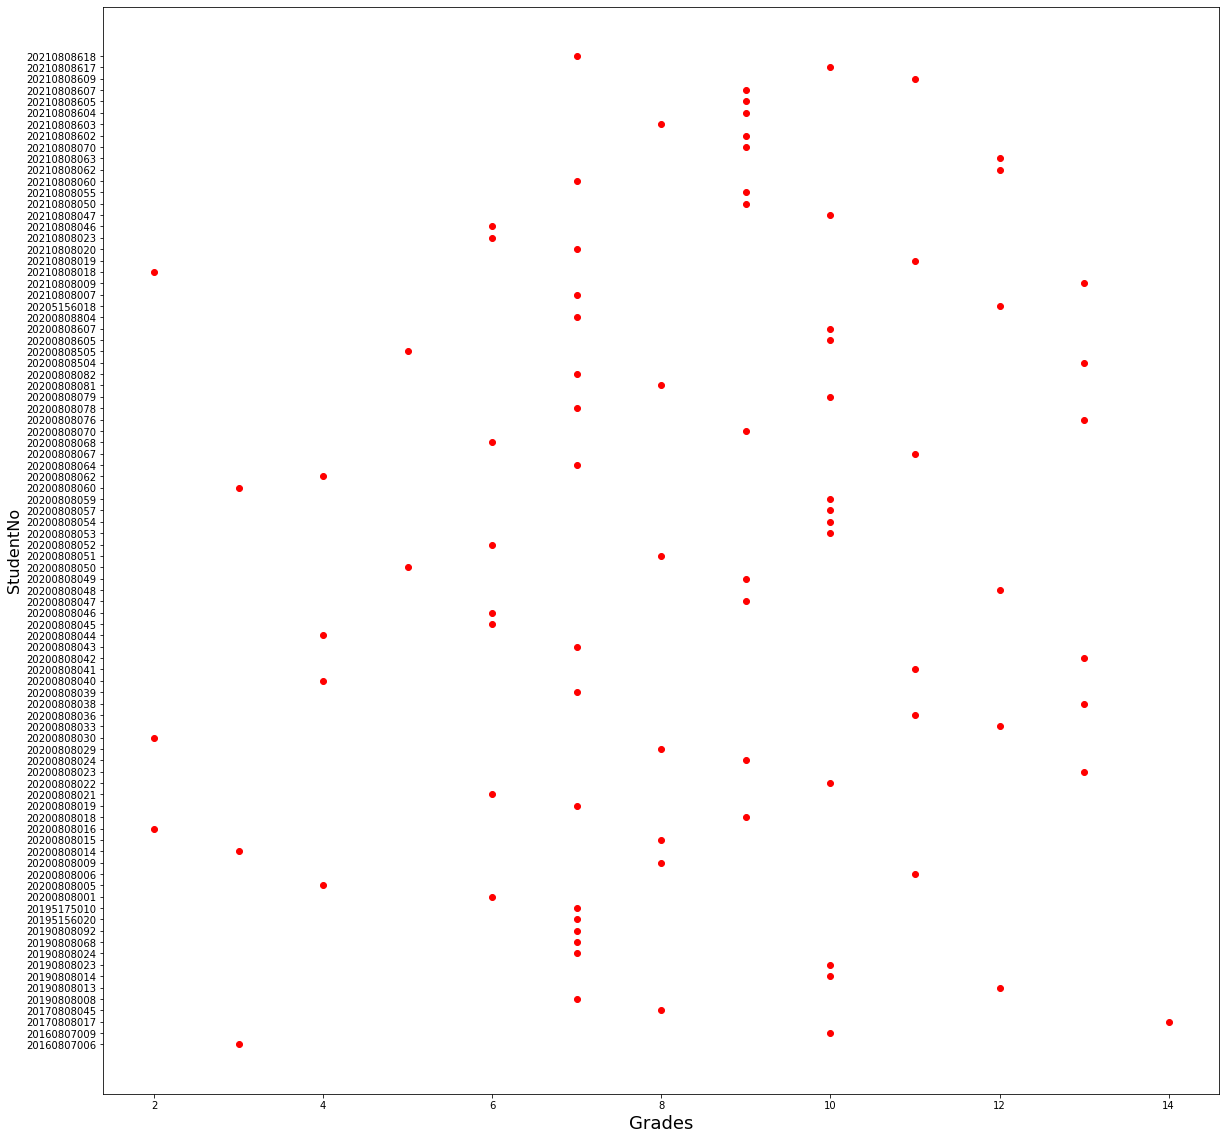

Number:    Encoder:    Original
20160807006 3 20
20160807009 10 10
20170808017 14 20
20170808045 8 10
20190808008 7 20
20190808013 12 10
20190808014 10 0
20190808023 10 0
20190808024 7 20
20190808068 7 0
20190808092 7 0
20195156020 7 0
20195175010 7 0
20200808001 6 10
20200808005 4 0
20200808006 11 20
20200808009 8 10
20200808014 3 0
20200808015 8 10
20200808016 2 0
20200808018 9 0
20200808019 7 0
20200808021 6 0
20200808022 10 10
20200808023 13 20
20200808024 9 0
20200808029 8 0
20200808030 2 0
20200808033 12 20
20200808036 11 20
20200808038 13 10
20200808039 7 20
20200808040 4 0
20200808041 11 20
20200808042 13 20
20200808043 7 0
20200808044 4 0
20200808045 6 0
20200808046 6 0
20200808047 9 10
20200808048 12 10
20200808049 9 10
20200808050 5 0
20200808051 8 0
20200808052 6 0
20200808053 10 10
20200808054 10 10
20200808057 10 10
20200808059 10 20
20200808060 3 0
20200808062 4 10
20200808064 7 0
20200808067 11 20
20200808068 6 0
20200808070 9 10
20200808076 13 10
20200808078 7 0
202008

'\ncf_matrix2 = confusion_matrix(data2,originalgrades2)\nprint(cf_matrix2)\nsns.heatmap(cf_matrix2,annot=True)\n'

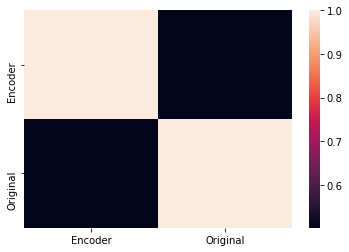

In [8]:
examQ2 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q2')
examQ2.fillna('', inplace=True)
examQ2.head()
answersQ2 = examQ2.iloc[:,2].values.tolist()
studentnoq2 = examQ2.iloc[:,0].values.tolist()
stno2 = []
originalgrades2 = examQ2.iloc[:,5].values.tolist()
for no in studentnoq2:
  stno2.append(str(no))
#print(answersQ1)

sentence_embeddings = model(answersQ2)
query2 = 'Sensitive and Accurate measurements can be made with Gases in Reaction. Gases are also easy to capture and observe. You could get numbers using the PV=nRT Equation..'
query_vec2 = model([query2])[0]
data2=[]
for sent in answersQ2:
  sim2 = cosine(query_vec2, model([sent])[0])
  grade = sim2*20
  if grade<0:
    grade = 0
  data2.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim2)

plt.figure(figsize=(20,20))
plt.plot(data2, stno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

grades2df = pd.DataFrame({'Encoder':data2,'Original':originalgrades2})
print("Number:    Encoder:    Original")
for i in range(len(grades2df)) :
  print(stno2[i],grades2df.loc[i, "Encoder"], grades2df.loc[i, "Original"])
print(grades2df.corr())

sns.heatmap(grades2df.corr())

r22 = r2_score(originalgrades2,data2)
print("R2: ",r22)

print("T-Test Result: ",stats.ttest_ind(originalgrades2,data2))

"""
cf_matrix2 = confusion_matrix(data2,originalgrades2)
print(cf_matrix2)
sns.heatmap(cf_matrix2,annot=True)
"""

**Roberta Large**

Sentence =  Because ,volume,weight, size calculasion in the air more easy ; similarity =  0.5289427
Sentence =  It allowed that measurement of gas with Analytical Balance. Weight, volume, pressure and templature was quantifiable now. ; similarity =  0.601546
Sentence =  Observing gases are more easy than the others . Also with the barometer and such tools we can measure its volume , pressure and the output of some reactions volume . Basically gases are more effective than the others.
 ; similarity =  0.7953815
Sentence =  because of the easly working on gases. they can expand or change the volume. they doing a vacuum tube in the liquid when some reactions occured they can observe with liqud volume in tube. ; similarity =  0.6896914
Sentence =  because its easy to calculate the everything and this time gas is important ; similarity =  0.6923082
Sentence =  P.V=n.R.T   with this formula we can figure out gases exacly .gases are pressable.and heat effects it. and gases have P.  which mean

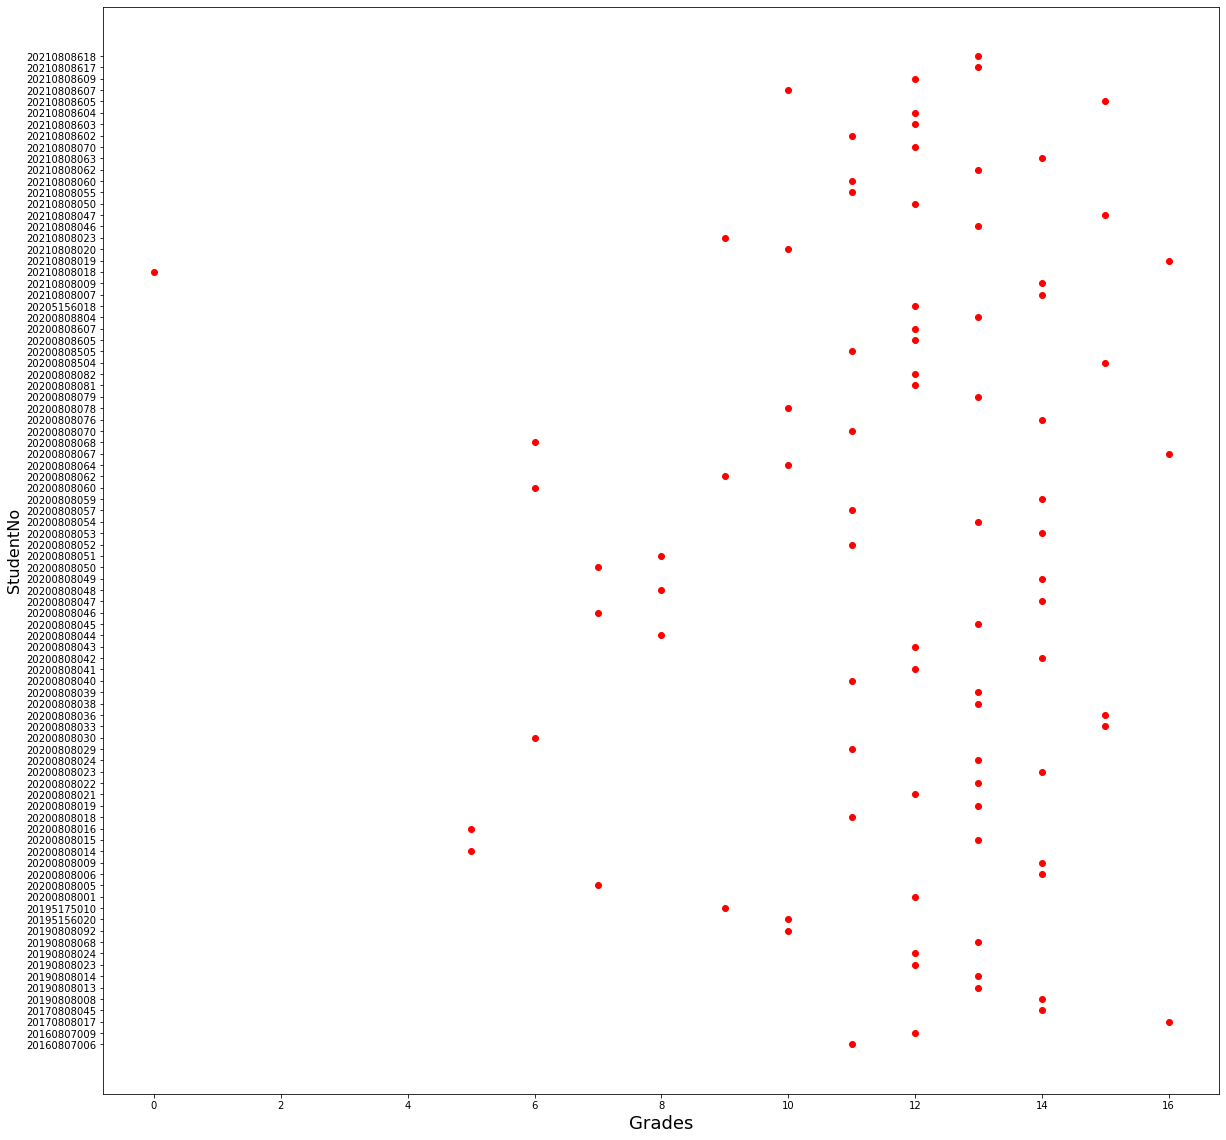

Number:    Encoder:    Original
20160807006 11 20
20160807009 12 10
20170808017 16 20
20170808045 14 10
20190808008 14 20
20190808013 13 10
20190808014 13 0
20190808023 12 0
20190808024 12 20
20190808068 13 0
20190808092 10 0
20195156020 10 0
20195175010 9 0
20200808001 12 10
20200808005 7 0
20200808006 14 20
20200808009 14 10
20200808014 5 0
20200808015 13 10
20200808016 5 0
20200808018 11 0
20200808019 13 0
20200808021 12 0
20200808022 13 10
20200808023 14 20
20200808024 13 0
20200808029 11 0
20200808030 6 0
20200808033 15 20
20200808036 15 20
20200808038 13 10
20200808039 13 20
20200808040 11 0
20200808041 12 20
20200808042 14 20
20200808043 12 0
20200808044 8 0
20200808045 13 0
20200808046 7 0
20200808047 14 10
20200808048 8 10
20200808049 14 10
20200808050 7 0
20200808051 8 0
20200808052 11 0
20200808053 14 10
20200808054 13 10
20200808057 11 10
20200808059 14 20
20200808060 6 0
20200808062 9 10
20200808064 10 0
20200808067 16 20
20200808068 6 0
20200808070 11 10
20200808076 14 10

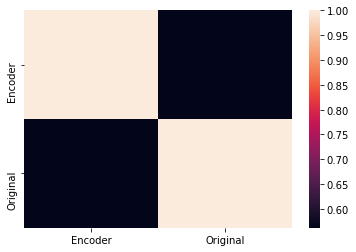

In [9]:
examQ2 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q2')
examQ2.fillna('', inplace=True)
examQ2.head()
answersQ2 = examQ2.iloc[:,2].values.tolist()
originalgrades2 = examQ2.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery2 = 'Sensitive and Accurate measurements can be made with Gases in Reaction. Gases are also easy to capture and observe. You could get numbers using the PV=nRT Equation.'
tquery_vec2 = tmodel.encode(([tquery2])[0])
tdata2 = []



tstudentnoq2 = examQ2.iloc[:,0].values.tolist()
tstno2 = []

for no in tstudentnoq2:
  tstno2.append(str(no))


for sent in answersQ2:
  tsim2 = cosine(tquery_vec2, tmodel.encode(([sent])[0]))
  tgrade2 = tsim2*20
  if tgrade2<0:
    tgrade2 = 0    
  tdata2.append(round(tgrade2))
  print("Sentence = ", sent, "; similarity = ", tsim2)

plt.figure(figsize=(20,20))
plt.plot(tdata2, tstno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

tgradesdf2 = pd.DataFrame({'Encoder':tdata2,'Original':originalgrades2})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf2)) :
  print(tstno2[i],tgradesdf2.loc[i, "Encoder"], tgradesdf2.loc[i, "Original"])
print(tgradesdf2.corr())

sns.heatmap(tgradesdf2.corr())
#R-Squared
tr22 = r2_score(originalgrades2,tdata2)
print("R2: ",tr22)
print("T-Test Result: ",stats.ttest_ind(originalgrades2,tdata2))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf2)


**Bert Base**

Sentence =  Because ,volume,weight, size calculasion in the air more easy ; similarity =  0.67561793
Sentence =  It allowed that measurement of gas with Analytical Balance. Weight, volume, pressure and templature was quantifiable now. ; similarity =  0.71217936
Sentence =  Observing gases are more easy than the others . Also with the barometer and such tools we can measure its volume , pressure and the output of some reactions volume . Basically gases are more effective than the others.
 ; similarity =  0.84699345
Sentence =  because of the easly working on gases. they can expand or change the volume. they doing a vacuum tube in the liquid when some reactions occured they can observe with liqud volume in tube. ; similarity =  0.6846483
Sentence =  because its easy to calculate the everything and this time gas is important ; similarity =  0.7945567
Sentence =  P.V=n.R.T   with this formula we can figure out gases exacly .gases are pressable.and heat effects it. and gases have P.  which 

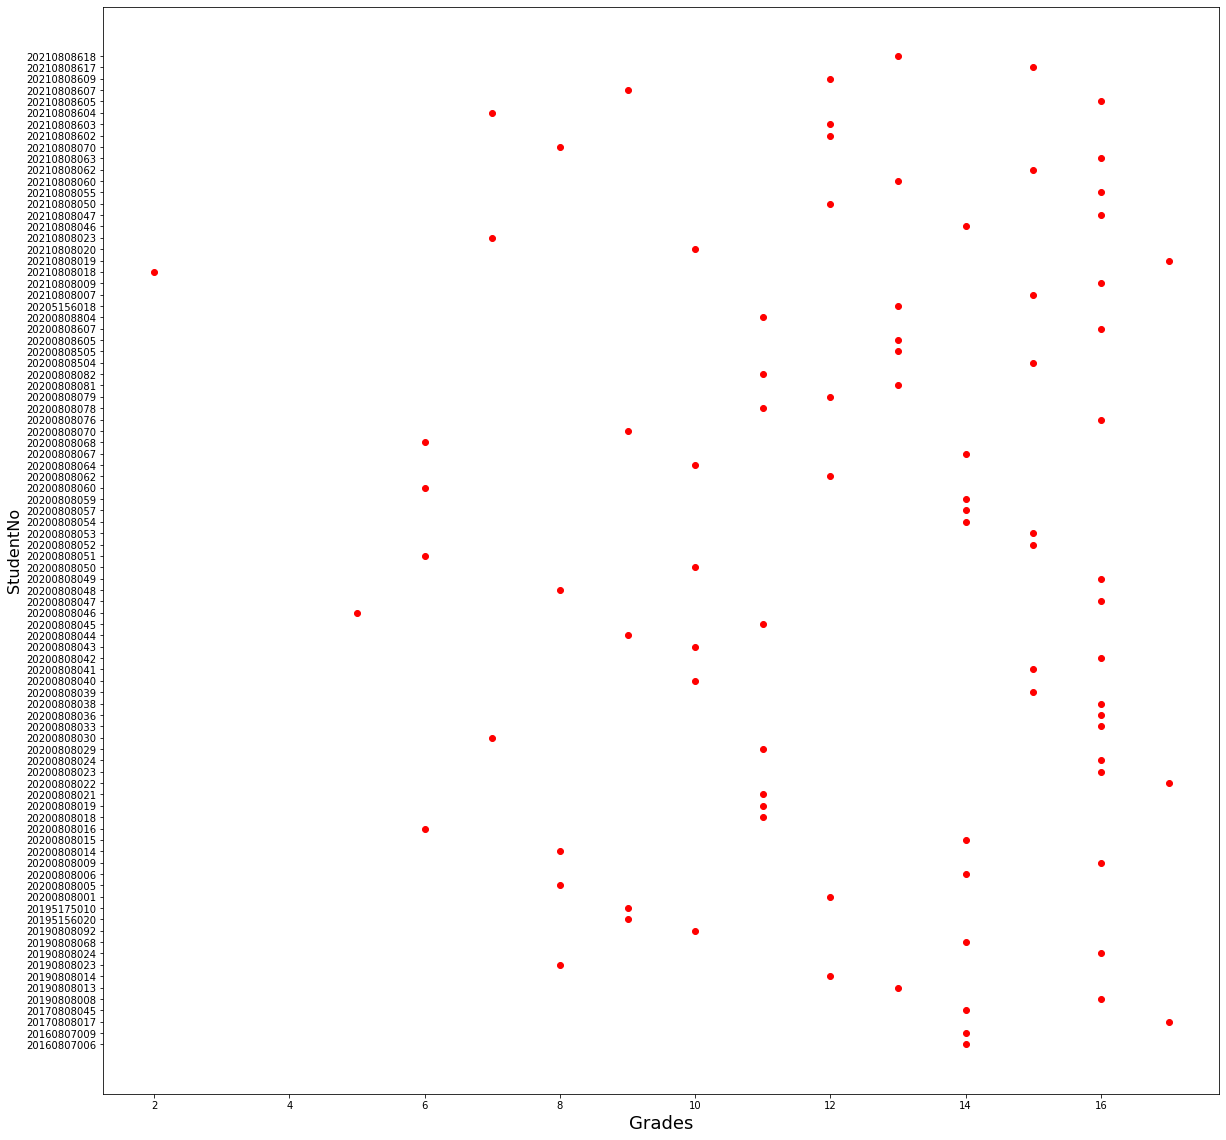

Number:    Encoder:    Original
20160807006 14 20
20160807009 14 0
20170808017 17 20
20170808045 14 12
20190808008 16 0
20190808013 13 0
20190808014 12 0
20190808023 8 12
20190808024 16 0
20190808068 14 0
20190808092 10 0
20195156020 9 20
20195175010 9 12
20200808001 12 0
20200808005 8 20
20200808006 14 5
20200808009 16 12
20200808014 8 0
20200808015 14 5
20200808016 6 0
20200808018 11 12
20200808019 11 0
20200808021 11 0
20200808022 17 0
20200808023 16 0
20200808024 16 0
20200808029 11 5
20200808030 7 0
20200808033 16 0
20200808036 16 0
20200808038 16 0
20200808039 15 17
20200808040 10 17
20200808041 15 0
20200808042 16 20
20200808043 10 0
20200808044 9 0
20200808045 11 0
20200808046 5 5
20200808047 16 0
20200808048 8 0
20200808049 16 12
20200808050 10 0
20200808051 6 0
20200808052 15 0
20200808053 15 0
20200808054 14 0
20200808057 14 12
20200808059 14 20
20200808060 6 17
20200808062 12 0
20200808064 10 12
20200808067 14 0
20200808068 6 20
20200808070 9 0
20200808076 16 0
20200808078 

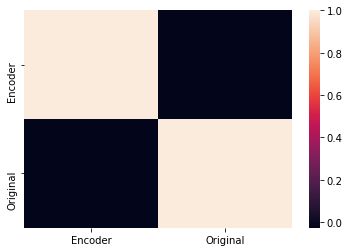

In [10]:
examQ2 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q2')
examQ2.fillna('', inplace=True)
examQ2.head()
answersQ2 = examQ2.iloc[:,2].values.tolist()
originalgrades2 = examQ2.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query2 = 'Sensitive and Accurate measurements can be made with Gases in Reaction. Gases are also easy to capture and observe. You could get numbers using the PV=nRT Equation.'
t2query_vec2 = tmodel2.encode(([t2query2])[0])
t2data2 = []



t2studentnoq2 = examQ2.iloc[:,0].values.tolist()
t2stno2 = []

for no in t2studentnoq2:
  t2stno2.append(str(no))


for sent in answersQ2:
  t2sim2 = cosine(t2query_vec2, tmodel2.encode(([sent])[0]))
  t2grade2 = t2sim2*20
  if t2grade2<0:
    t2grade2 = 0    
  t2data2.append(round(t2grade2))
  print("Sentence = ", sent, "; similarity = ", t2sim2)

plt.figure(figsize=(20,20))
plt.plot(t2data2, t2stno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

t2gradesdf2 = pd.DataFrame({'Encoder':t2data2,'Original':originalgrades})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf2)) :
  print(t2stno2[i],t2gradesdf2.loc[i, "Encoder"], t2gradesdf2.loc[i, "Original"])
print(t2gradesdf2.corr())

sns.heatmap(t2gradesdf2.corr())
#R-Squared
t2r22 = r2_score(originalgrades2,t2data2)
print("R2: ",t2r22)
print("T-Test Result: ",stats.ttest_ind(originalgrades2,t2data2))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf2)

**Q3**

Sentence =  because can division easly
that atoms is control other atoms ; similarity =  0.09355413
Sentence =  Because of Fruit Fly has nearly same genetics like humans. Because of similarity of genetics, he studied on Fruit Fly.  ; similarity =  0.64073384
Sentence =  Morgan choose fruit flies because they have a short life cycle . They grow fast and also dies fast. ; similarity =  0.65718186
Sentence =  morgan choose fruit fly because of their lifetime is just 30 days. And their make too much eggs so population rapidly increasing. and it cost's is acceptable. ; similarity =  0.5445259
Sentence =  he want to cahnge something and because fruit fly dont take polen out of the flower and you can see the changing of genetics. you can calculate genetics code ; similarity =  0.5325978
Sentence =  awards always motivatite people .because when you do stuff and someone appreaciate you .that feels really good .and  the thing that youdone  ,your spending time worth it with awards. in this case M

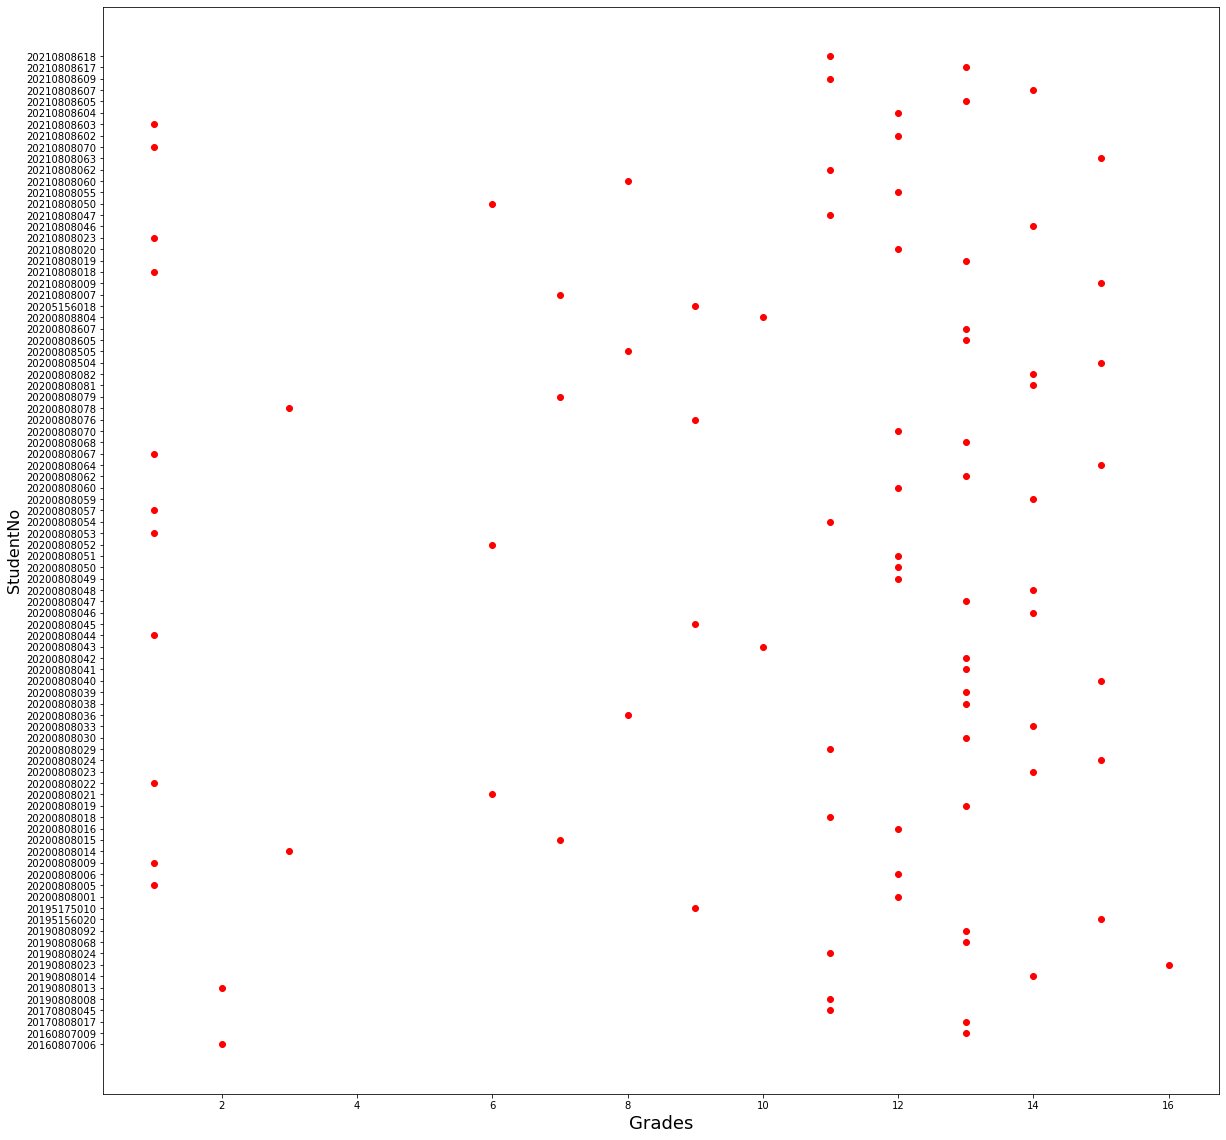

Number:    Encoder:    Original
20160807006 2 0
20160807009 13 6
20170808017 13 6
20170808045 11 0
20190808008 11 0
20190808013 2 0
20190808014 14 18
20190808023 16 18
20190808024 11 0
20190808068 13 6
20190808092 13 6
20195156020 15 12
20195175010 9 6
20200808001 12 6
20200808005 1 0
20200808006 12 12
20200808009 1 0
20200808014 3 0
20200808015 7 0
20200808016 12 6
20200808018 11 18
20200808019 13 6
20200808021 6 0
20200808022 1 0
20200808023 14 20
20200808024 15 6
20200808029 11 6
20200808030 13 18
20200808033 14 12
20200808036 8 12
20200808038 13 12
20200808039 13 6
20200808040 15 20
20200808041 13 6
20200808042 13 6
20200808043 10 6
20200808044 1 0
20200808045 9 0
20200808046 14 12
20200808047 13 6
20200808048 14 0
20200808049 12 6
20200808050 12 0
20200808051 12 18
20200808052 6 6
20200808053 1 0
20200808054 11 6
20200808057 1 0
20200808059 14 12
20200808060 12 12
20200808062 13 6
20200808064 15 12
20200808067 1 0
20200808068 13 12
20200808070 12 6
20200808076 9 6
20200808078 3 0


'\ncf_matrix3 = confusion_matrix(data3,originalgrades3)\nprint(cf_matrix3)\nsns.heatmap(cf_matrix3,annot=True)\n'

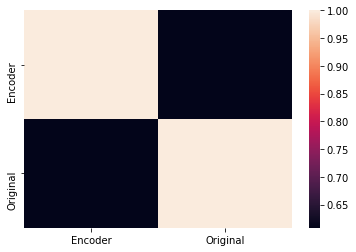

In [11]:
examQ3 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q3')
examQ3.fillna('', inplace=True)
examQ3.head()
answersQ3 = examQ3.iloc[:,2].values.tolist()

studentnoq3 = examQ3.iloc[:,0].values.tolist()
stno3 = []

for no in studentnoq3:
  stno3.append(str(no))
#print(answersQ1)
originalgrades3 = examQ3.iloc[:,5].values.tolist()
sentence_embeddings3 = model(answersQ3)
query3 = "Morgan was trying to understand if Mendel's Genetics Hypothesis is right with Animals. He chose Fruit Flies as model animal. Because they are cheap, easy to grow, multiply fast, has short life-cycle and logistically easy to handle. Fruit Flies share 70 percent of the genome with Humans."
query_vec3 = model([query3])[0]
data3 = []
for sent in answersQ3:
  sim3 = cosine(query_vec3, model([sent])[0])
  grade = sim3*20
  if grade<0:
    grade = 0
  data3.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim3)

plt.figure(figsize=(20,20))
plt.plot(data3, stno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

grades3df = pd.DataFrame({'Encoder':data3,'Original':originalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(grades3df)) :
  print(stno3[i],grades3df.loc[i, "Encoder"], grades3df.loc[i, "Original"])
print(grades3df.corr())

sns.heatmap(grades3df.corr())
r23 = r2_score(originalgrades3,data3)
print("R2: ",r23)
print("T-Test Result: ",stats.ttest_ind(originalgrades3,data3))
"""
cf_matrix3 = confusion_matrix(data3,originalgrades3)
print(cf_matrix3)
sns.heatmap(cf_matrix3,annot=True)
"""

**Roberta Large**

Sentence =  because can division easly
that atoms is control other atoms ; similarity =  0.39876688
Sentence =  Because of Fruit Fly has nearly same genetics like humans. Because of similarity of genetics, he studied on Fruit Fly.  ; similarity =  0.70614165
Sentence =  Morgan choose fruit flies because they have a short life cycle . They grow fast and also dies fast. ; similarity =  0.6794562
Sentence =  morgan choose fruit fly because of their lifetime is just 30 days. And their make too much eggs so population rapidly increasing. and it cost's is acceptable. ; similarity =  0.69456756
Sentence =  he want to cahnge something and because fruit fly dont take polen out of the flower and you can see the changing of genetics. you can calculate genetics code ; similarity =  0.50858474
Sentence =  awards always motivatite people .because when you do stuff and someone appreaciate you .that feels really good .and  the thing that youdone  ,your spending time worth it with awards. in this case 

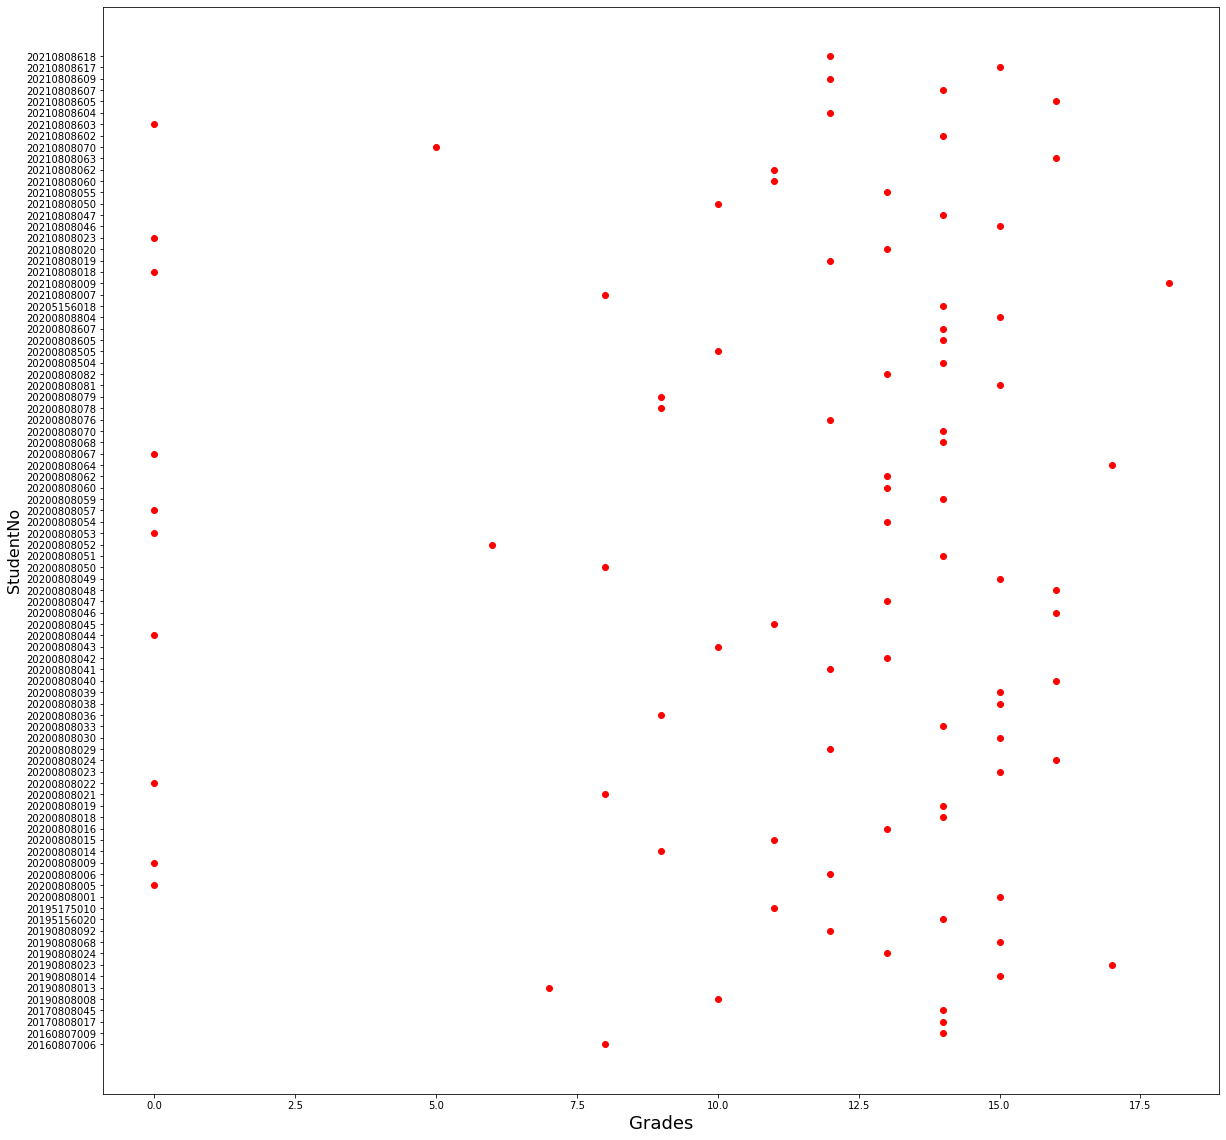

Number:    Encoder:    Original
20160807006 8 0
20160807009 14 6
20170808017 14 6
20170808045 14 0
20190808008 10 0
20190808013 7 0
20190808014 15 18
20190808023 17 18
20190808024 13 0
20190808068 15 6
20190808092 12 6
20195156020 14 12
20195175010 11 6
20200808001 15 6
20200808005 0 0
20200808006 12 12
20200808009 0 0
20200808014 9 0
20200808015 11 0
20200808016 13 6
20200808018 14 18
20200808019 14 6
20200808021 8 0
20200808022 0 0
20200808023 15 20
20200808024 16 6
20200808029 12 6
20200808030 15 18
20200808033 14 12
20200808036 9 12
20200808038 15 12
20200808039 15 6
20200808040 16 20
20200808041 12 6
20200808042 13 6
20200808043 10 6
20200808044 0 0
20200808045 11 0
20200808046 16 12
20200808047 13 6
20200808048 16 0
20200808049 15 6
20200808050 8 0
20200808051 14 18
20200808052 6 6
20200808053 0 0
20200808054 13 6
20200808057 0 0
20200808059 14 12
20200808060 13 12
20200808062 13 6
20200808064 17 12
20200808067 0 0
20200808068 14 12
20200808070 14 6
20200808076 12 6
20200808078 9

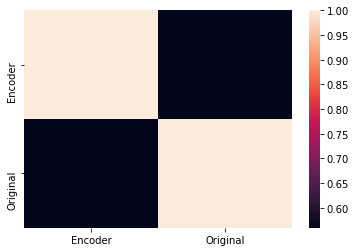

In [12]:
examQ3 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q3')
examQ3.fillna('', inplace=True)
examQ3.head()
answersQ3 = examQ3.iloc[:,2].values.tolist()
originalgrades3 = examQ3.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery3 = "Morgan was trying to understand if Mendel's Genetics Hypothesis is right with Animals. He chose Fruit Flies as model animal. Because they are cheap, easy to grow, multiply fast, has short life-cycle and logistically easy to handle. Fruit Flies share 70 percent of the genome with Humans."
tquery_vec3 = tmodel.encode(([tquery3])[0])
tdata3 = []



tstudentnoq3 = examQ3.iloc[:,0].values.tolist()
tstno3 = []

for no in tstudentnoq3:
  tstno3.append(str(no))


for sent in answersQ3:
  tsim3 = cosine(tquery_vec3, tmodel.encode(([sent])[0]))
  tgrade3 = tsim3*20
  if tgrade3<0:
    tgrade3 = 0    
  tdata3.append(round(tgrade3))
  print("Sentence = ", sent, "; similarity = ", tsim3)

plt.figure(figsize=(20,20))
plt.plot(tdata3, tstno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

tgradesdf3 = pd.DataFrame({'Encoder':tdata3,'Original':originalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf3)) :
  print(tstno3[i],tgradesdf3.loc[i, "Encoder"], tgradesdf3.loc[i, "Original"])
print(tgradesdf3.corr())

sns.heatmap(tgradesdf3.corr())
#R-Squared
tr23 = r2_score(originalgrades3,tdata3)
print("R2: ",tr22)
print("T-Test Result: ",stats.ttest_ind(originalgrades3,tdata3))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf3)

**Bert Base**

Sentence =  because can division easly
that atoms is control other atoms ; similarity =  0.25515103
Sentence =  Because of Fruit Fly has nearly same genetics like humans. Because of similarity of genetics, he studied on Fruit Fly.  ; similarity =  0.75848013
Sentence =  Morgan choose fruit flies because they have a short life cycle . They grow fast and also dies fast. ; similarity =  0.7386072
Sentence =  morgan choose fruit fly because of their lifetime is just 30 days. And their make too much eggs so population rapidly increasing. and it cost's is acceptable. ; similarity =  0.7183576
Sentence =  he want to cahnge something and because fruit fly dont take polen out of the flower and you can see the changing of genetics. you can calculate genetics code ; similarity =  0.66348207
Sentence =  awards always motivatite people .because when you do stuff and someone appreaciate you .that feels really good .and  the thing that youdone  ,your spending time worth it with awards. in this case M

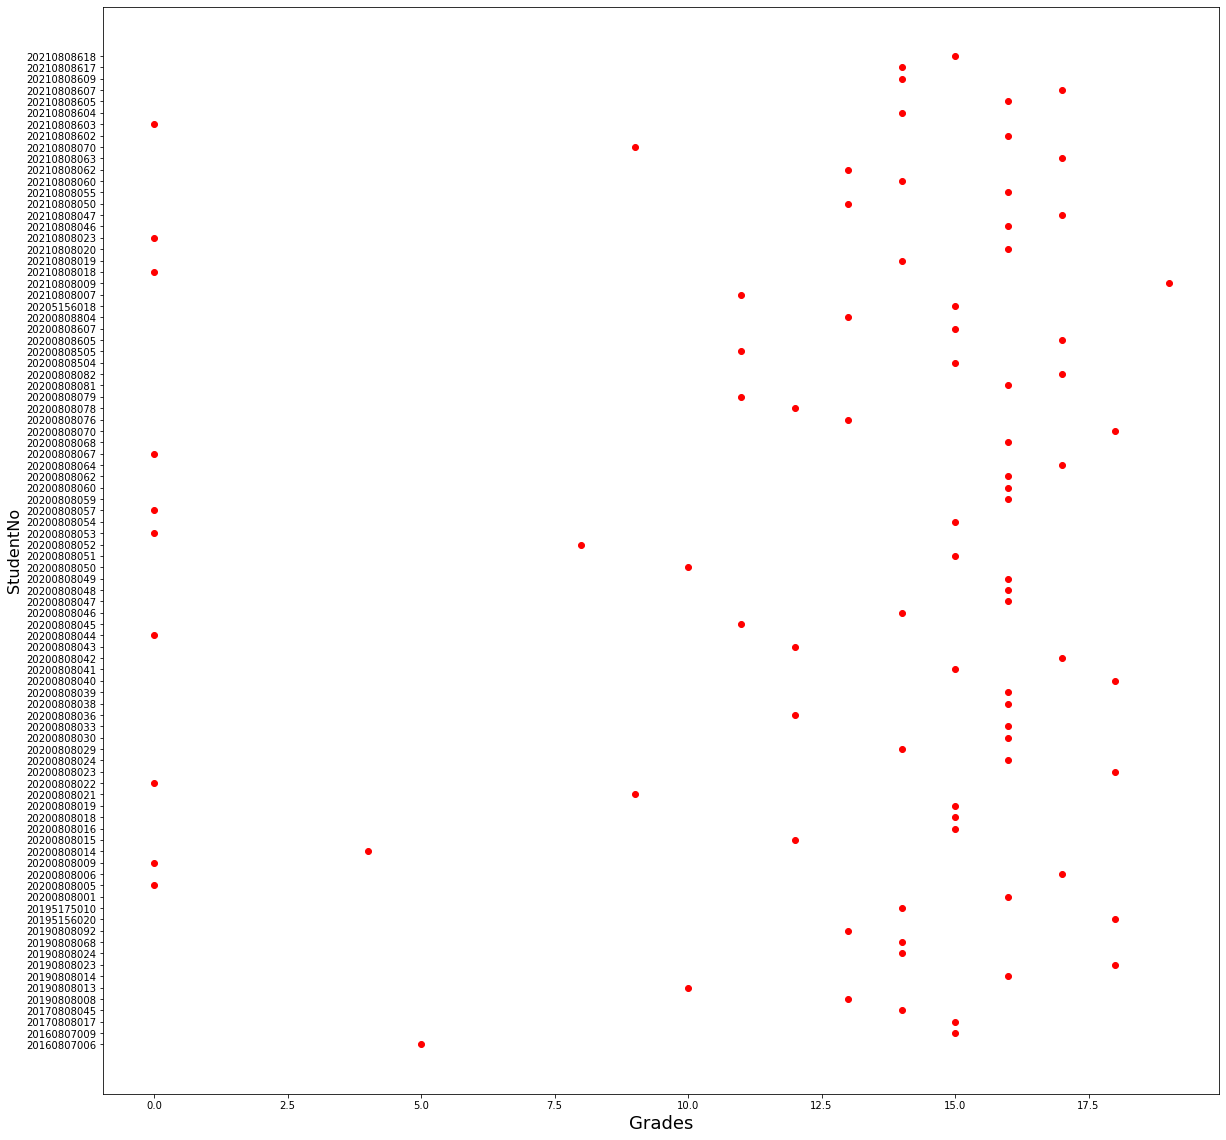

Number:    Encoder:    Original
20160807006 5 0
20160807009 15 6
20170808017 15 6
20170808045 14 0
20190808008 13 0
20190808013 10 0
20190808014 16 18
20190808023 18 18
20190808024 14 0
20190808068 14 6
20190808092 13 6
20195156020 18 12
20195175010 14 6
20200808001 16 6
20200808005 0 0
20200808006 17 12
20200808009 0 0
20200808014 4 0
20200808015 12 0
20200808016 15 6
20200808018 15 18
20200808019 15 6
20200808021 9 0
20200808022 0 0
20200808023 18 20
20200808024 16 6
20200808029 14 6
20200808030 16 18
20200808033 16 12
20200808036 12 12
20200808038 16 12
20200808039 16 6
20200808040 18 20
20200808041 15 6
20200808042 17 6
20200808043 12 6
20200808044 0 0
20200808045 11 0
20200808046 14 12
20200808047 16 6
20200808048 16 0
20200808049 16 6
20200808050 10 0
20200808051 15 18
20200808052 8 6
20200808053 0 0
20200808054 15 6
20200808057 0 0
20200808059 16 12
20200808060 16 12
20200808062 16 6
20200808064 17 12
20200808067 0 0
20200808068 16 12
20200808070 18 6
20200808076 13 6
2020080807

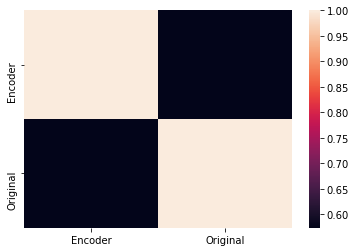

In [13]:
examQ3 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q3')
examQ3.fillna('', inplace=True)
examQ3.head()
answersQ3 = examQ3.iloc[:,2].values.tolist()
originalgrades3 = examQ3.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query3 = "Morgan was trying to understand if Mendel's Genetics Hypothesis is right with Animals. He chose Fruit Flies as model animal. Because they are cheap, easy to grow, multiply fast, has short life-cycle and logistically easy to handle. Fruit Flies share 70 percent of the genome with Humans."
t2query_vec3 = tmodel2.encode(([t2query3])[0])
t2data3 = []



t2studentnoq3 = examQ3.iloc[:,0].values.tolist()
t2stno3 = []

for no in t2studentnoq3:
  t2stno3.append(str(no))


for sent in answersQ3:
  t2sim3 = cosine(t2query_vec3, tmodel2.encode(([sent])[0]))
  t2grade3 = t2sim3*20
  if t2grade3<0:
    t2grade3 = 0    
  t2data3.append(round(t2grade3))
  print("Sentence = ", sent, "; similarity = ", t2sim3)

plt.figure(figsize=(20,20))
plt.plot(t2data3, t2stno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

t2gradesdf3 = pd.DataFrame({'Encoder':t2data3,'Original':originalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf3)) :
  print(t2stno3[i],t2gradesdf3.loc[i, "Encoder"], t2gradesdf3.loc[i, "Original"])
print(t2gradesdf3.corr())

sns.heatmap(t2gradesdf3.corr())
#R-Squared
t2r23 = r2_score(originalgrades3,t2data3)
print("R2: ",t2r23)
print("T-Test Result: ",stats.ttest_ind(originalgrades3,t2data3))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf3)

**Q4**

Sentence =  theoriticl thinking less than other science
vitalist the organic from inorganic
all of them work and explain  cell , atoms , genetics ; similarity =  0.49004406
Sentence =  The most important relationship is  all of them interested biology. Using the biochemistry we can improve molecular biology and improve molecular biology we can study on genetics.  ; similarity =  0.5994716
Sentence =  Before all these terms (chemistry , biochemistry , molecular biology and genetics) we use to study on different things like light or math etc. We didn't know anything about these terms once we started to discover other things it lead us to found these terms . Newton and other scientist studied on light and we finally found telescope and similar tools and we found elements and chemistry has born with chemistry we could find microscobic compounds it lead us to molecular biology and once we collect more information about all these molecular biology and genetics etc. used all these information

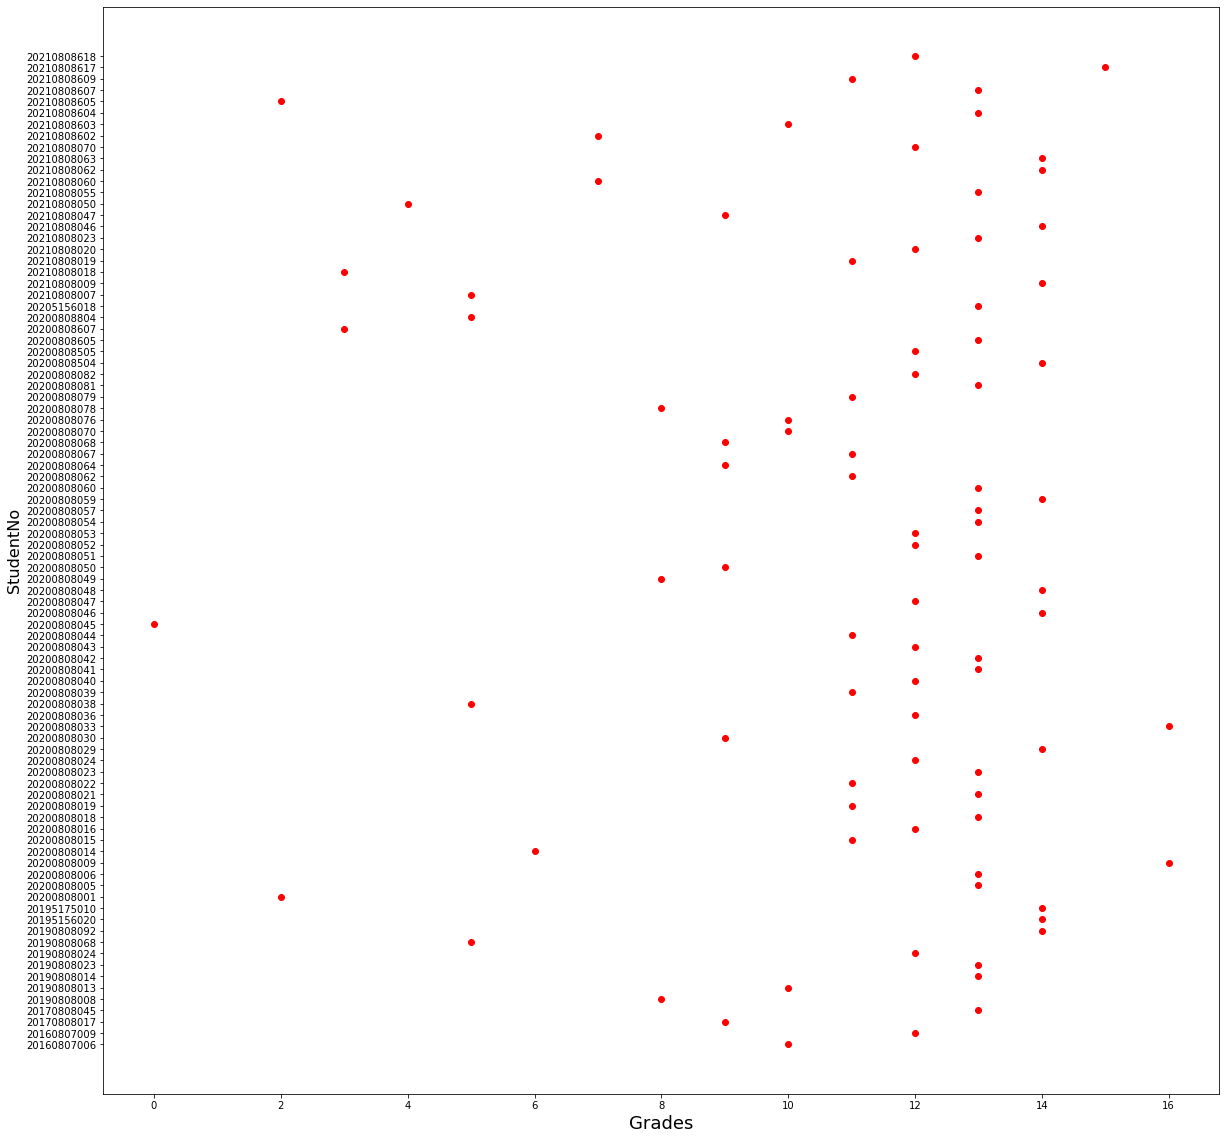

Number:    Encoder:    Original
20160807006 10 0
20160807009 12 0
20170808017 9 5
20170808045 13 10
20190808008 8 10
20190808013 10 0
20190808014 13 0
20190808023 13 20
20190808024 12 0
20190808068 5 0
20190808092 14 0
20195156020 14 10
20195175010 14 10
20200808001 2 0
20200808005 13 0
20200808006 13 15
20200808009 16 10
20200808014 6 0
20200808015 11 0
20200808016 12 10
20200808018 13 10
20200808019 11 0
20200808021 13 10
20200808022 11 0
20200808023 13 15
20200808024 12 15
20200808029 14 15
20200808030 9 10
20200808033 16 10
20200808036 12 0
20200808038 5 0
20200808039 11 0
20200808040 12 15
20200808041 13 10
20200808042 13 0
20200808043 12 10
20200808044 11 10
20200808045 0 0
20200808046 14 10
20200808047 12 0
20200808048 14 10
20200808049 8 0
20200808050 9 0
20200808051 13 0
20200808052 12 0
20200808053 12 0
20200808054 13 0
20200808057 13 10
20200808059 14 10
20200808060 13 15
20200808062 11 10
20200808064 9 10
20200808067 11 15
20200808068 9 0
20200808070 10 0
20200808076 10 10


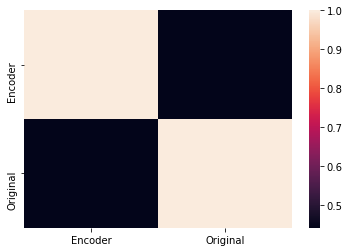

In [14]:
examQ4 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q4')
examQ4.fillna('', inplace=True)
examQ4.head()
answersQ4 = examQ4.iloc[:,2].values.tolist()

studentnoq4 = examQ4.iloc[:,0].values.tolist()
stno4 = []

for no in studentnoq4:
  stno4.append(str(no))
#print(answersQ1)

sentence_embeddings4 = model(answersQ4)
query4 = "Biochemistry isolates the protein of the functional organ and studies the chemical composition of the puree. Genetics study the population and observe how traits are being transmitted from parents to offspring through genes. Molecular Biology isolates the gene (DNA) and arrives at the protein form for biochemistry."
query_vec4 = model([query4])[0]
data4=[]
for sent in answersQ4:
  sim4 = cosine(query_vec4, model([sent])[0])
  grade = sim4*20
  if grade<0:
    grade = 0
  data4.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim4)

plt.figure(figsize=(20,20))
plt.plot(data4, stno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
originalgrades4 = examQ4.iloc[:,5].values.tolist()
grades4df = pd.DataFrame({'Encoder':data4,'Original':originalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(grades4df)) :
  print(stno4[i],grades4df.loc[i, "Encoder"], grades4df.loc[i, "Original"])
print(grades4df.corr())

sns.heatmap(grades4df.corr())

r24 = r2_score(originalgrades4,data4)
print("R2: ",r24)

**Roberta Large**

Sentence =  theoriticl thinking less than other science
vitalist the organic from inorganic
all of them work and explain  cell , atoms , genetics ; similarity =  0.48612198
Sentence =  The most important relationship is  all of them interested biology. Using the biochemistry we can improve molecular biology and improve molecular biology we can study on genetics.  ; similarity =  0.4904696
Sentence =  Before all these terms (chemistry , biochemistry , molecular biology and genetics) we use to study on different things like light or math etc. We didn't know anything about these terms once we started to discover other things it lead us to found these terms . Newton and other scientist studied on light and we finally found telescope and similar tools and we found elements and chemistry has born with chemistry we could find microscobic compounds it lead us to molecular biology and once we collect more information about all these molecular biology and genetics etc. used all these information

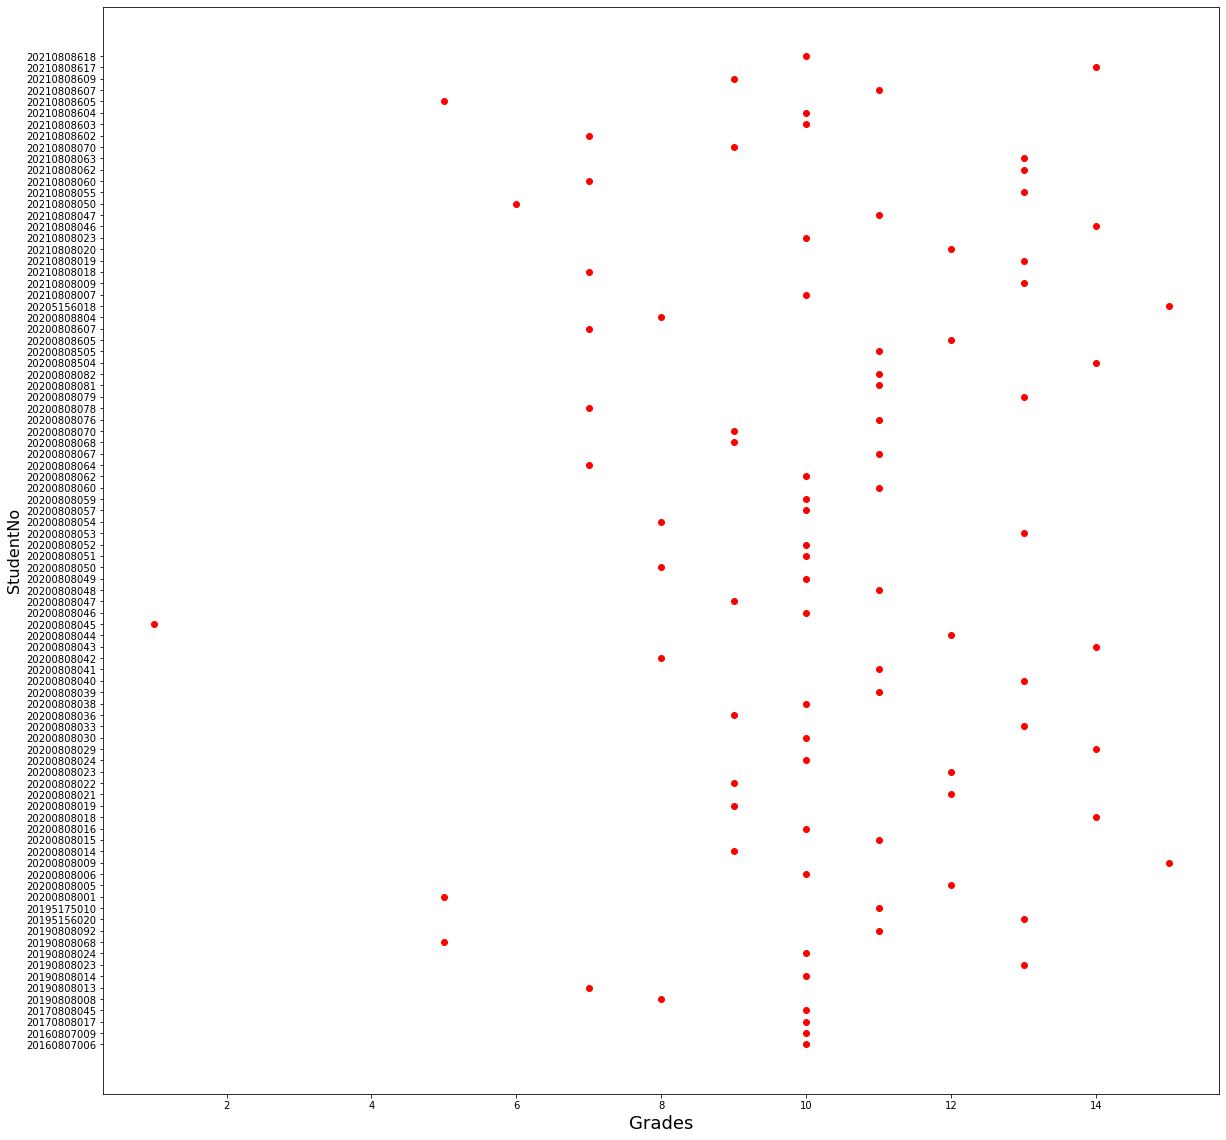

Number:    Encoder:    Original
20160807006 10 0
20160807009 10 0
20170808017 10 5
20170808045 10 10
20190808008 8 10
20190808013 7 0
20190808014 10 0
20190808023 13 20
20190808024 10 0
20190808068 5 0
20190808092 11 0
20195156020 13 10
20195175010 11 10
20200808001 5 0
20200808005 12 0
20200808006 10 15
20200808009 15 10
20200808014 9 0
20200808015 11 0
20200808016 10 10
20200808018 14 10
20200808019 9 0
20200808021 12 10
20200808022 9 0
20200808023 12 15
20200808024 10 15
20200808029 14 15
20200808030 10 10
20200808033 13 10
20200808036 9 0
20200808038 10 0
20200808039 11 0
20200808040 13 15
20200808041 11 10
20200808042 8 0
20200808043 14 10
20200808044 12 10
20200808045 1 0
20200808046 10 10
20200808047 9 0
20200808048 11 10
20200808049 10 0
20200808050 8 0
20200808051 10 0
20200808052 10 0
20200808053 13 0
20200808054 8 0
20200808057 10 10
20200808059 10 10
20200808060 11 15
20200808062 10 10
20200808064 7 10
20200808067 11 15
20200808068 9 0
20200808070 9 0
20200808076 11 10
2020

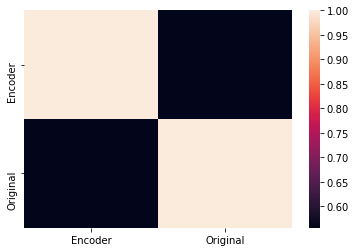

In [15]:
examQ4 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q4')
examQ4.fillna('', inplace=True)
examQ4.head()
answersQ4 = examQ4.iloc[:,2].values.tolist()
originalgrades4 = examQ4.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery4 = "Biochemistry isolates the protein of the functional organ and studies the chemical composition of the puree. Genetics study the population and observe how traits are being transmitted from parents to offspring through genes. Molecular Biology isolates the gene (DNA) and arrives at the protein form for biochemistry."
tquery_vec4 = tmodel.encode(([tquery4])[0])
tdata4 = []



tstudentnoq4 = examQ4.iloc[:,0].values.tolist()
tstno4 = []

for no in tstudentnoq4:
  tstno4.append(str(no))


for sent in answersQ4:
  tsim4 = cosine(tquery_vec4, tmodel.encode(([sent])[0]))
  tgrade4 = tsim4*20
  if tgrade4<0:
    tgrade4 = 0    
  tdata4.append(round(tgrade4))
  print("Sentence = ", sent, "; similarity = ", tsim4)

plt.figure(figsize=(20,20))
plt.plot(tdata4, tstno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

tgradesdf4 = pd.DataFrame({'Encoder':tdata4,'Original':originalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf4)) :
  print(tstno4[i],tgradesdf4.loc[i, "Encoder"], tgradesdf4.loc[i, "Original"])
print(tgradesdf4.corr())

sns.heatmap(tgradesdf4.corr())
#R-Squared
tr24 = r2_score(originalgrades4,tdata4)
print("R2: ",tr24)
print("T-Test Result: ",stats.ttest_ind(originalgrades4,tdata4))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf4)

**Bert Base**

Sentence =  theoriticl thinking less than other science
vitalist the organic from inorganic
all of them work and explain  cell , atoms , genetics ; similarity =  0.5946821
Sentence =  The most important relationship is  all of them interested biology. Using the biochemistry we can improve molecular biology and improve molecular biology we can study on genetics.  ; similarity =  0.69309807
Sentence =  Before all these terms (chemistry , biochemistry , molecular biology and genetics) we use to study on different things like light or math etc. We didn't know anything about these terms once we started to discover other things it lead us to found these terms . Newton and other scientist studied on light and we finally found telescope and similar tools and we found elements and chemistry has born with chemistry we could find microscobic compounds it lead us to molecular biology and once we collect more information about all these molecular biology and genetics etc. used all these information

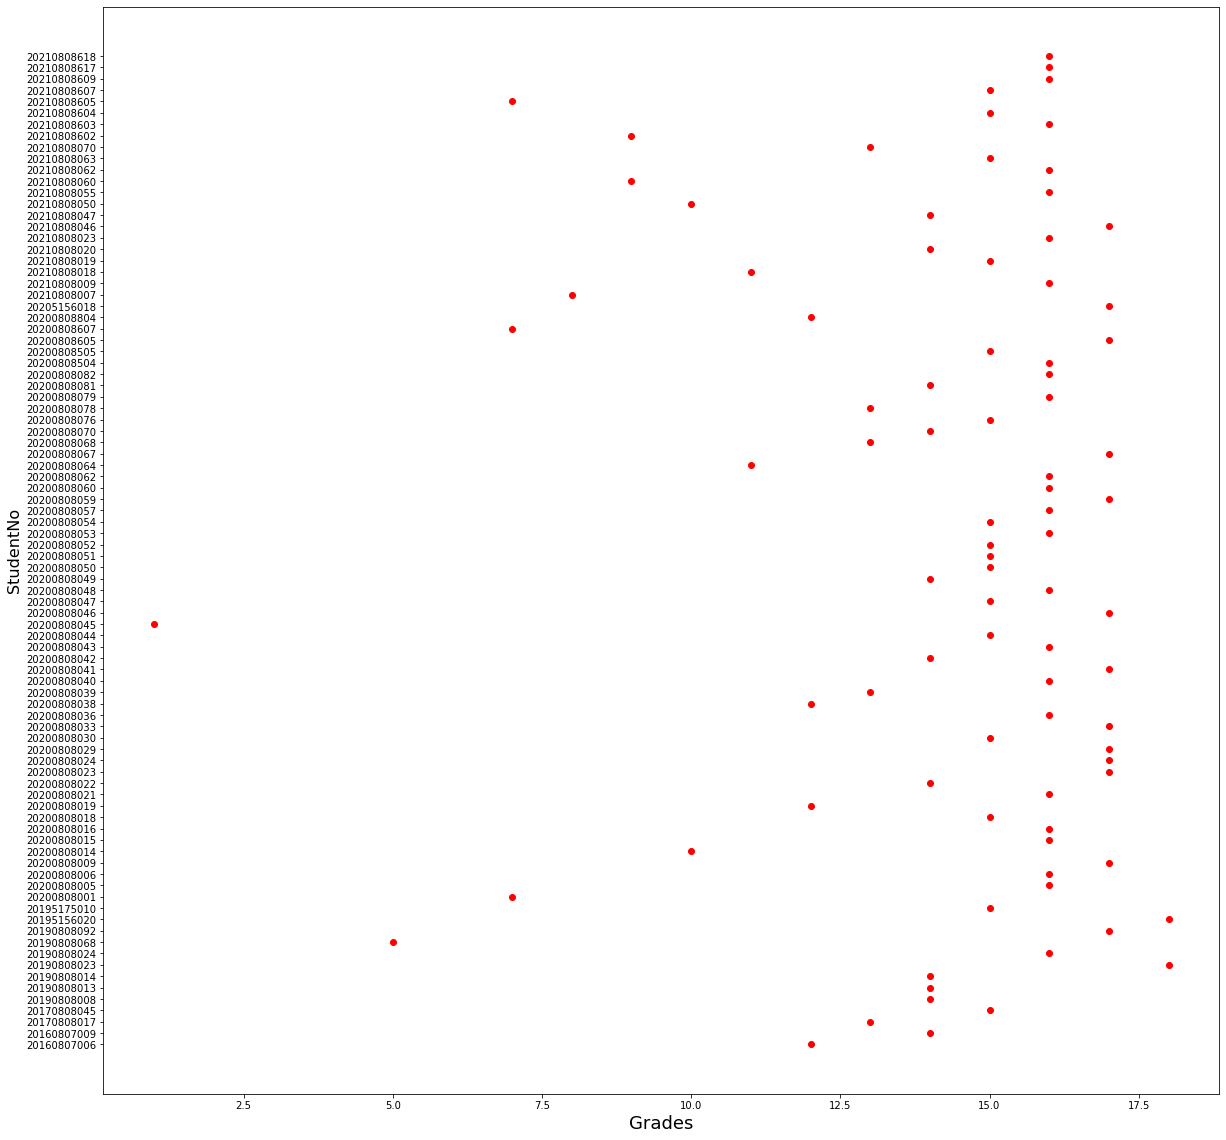

Number:    Encoder:    Original
20160807006 12 0
20160807009 14 0
20170808017 13 5
20170808045 15 10
20190808008 14 10
20190808013 14 0
20190808014 14 0
20190808023 18 20
20190808024 16 0
20190808068 5 0
20190808092 17 0
20195156020 18 10
20195175010 15 10
20200808001 7 0
20200808005 16 0
20200808006 16 15
20200808009 17 10
20200808014 10 0
20200808015 16 0
20200808016 16 10
20200808018 15 10
20200808019 12 0
20200808021 16 10
20200808022 14 0
20200808023 17 15
20200808024 17 15
20200808029 17 15
20200808030 15 10
20200808033 17 10
20200808036 16 0
20200808038 12 0
20200808039 13 0
20200808040 16 15
20200808041 17 10
20200808042 14 0
20200808043 16 10
20200808044 15 10
20200808045 1 0
20200808046 17 10
20200808047 15 0
20200808048 16 10
20200808049 14 0
20200808050 15 0
20200808051 15 0
20200808052 15 0
20200808053 16 0
20200808054 15 0
20200808057 16 10
20200808059 17 10
20200808060 16 15
20200808062 16 10
20200808064 11 10
20200808067 17 15
20200808068 13 0
20200808070 14 0
202008080

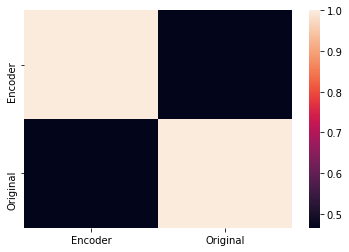

In [16]:
examQ4 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q4')
examQ4.fillna('', inplace=True)
examQ4.head()
answersQ4 = examQ4.iloc[:,2].values.tolist()
originalgrades4 = examQ4.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query4 = "Biochemistry isolates the protein of the functional organ and studies the chemical composition of the puree. Genetics study the population and observe how traits are being transmitted from parents to offspring through genes. Molecular Biology isolates the gene (DNA) and arrives at the protein form for biochemistry."
t2query_vec4 = tmodel2.encode(([t2query4])[0])
t2data4 = []



t2studentnoq4 = examQ4.iloc[:,0].values.tolist()
t2stno4 = []

for no in t2studentnoq4:
  t2stno4.append(str(no))


for sent in answersQ4:
  t2sim4 = cosine(t2query_vec4, tmodel2.encode(([sent])[0]))
  t2grade4 = t2sim4*20
  if t2grade4<0:
    t2grade4 = 0    
  t2data4.append(round(t2grade4))
  print("Sentence = ", sent, "; similarity = ", t2sim4)

plt.figure(figsize=(20,20))
plt.plot(t2data4, t2stno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

t2gradesdf4 = pd.DataFrame({'Encoder':t2data4,'Original':originalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf4)) :
  print(t2stno4[i],t2gradesdf4.loc[i, "Encoder"], t2gradesdf4.loc[i, "Original"])
print(t2gradesdf4.corr())

sns.heatmap(t2gradesdf4.corr())
#R-Squared
t2r24 = r2_score(originalgrades4,t2data4)
print("R2: ",t2r24)
print("T-Test Result: ",stats.ttest_ind(originalgrades4,t2data4))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf4)

**Q5**

Sentence =  wealth increases by the division of labory , work ,job
State just use economy for the bridge , justice
 ; similarity =  0.2942947
Sentence =  Adam Smith believe that wealth was enhanced by division of labor.  ; similarity =  0.34611532
Sentence =  According to Smith division of labors is the key of increasing the wealth. ; similarity =  0.3257384
Sentence =  according to smith wealth icreases because of effecting of temprature pressure volume and liquid type. ; similarity =  0.015338542
Sentence =  Its for posion gas ; similarity =  0.058517348
Sentence =   ; similarity =  0.023317236
Sentence =  Wealth increases exponantial. The more you have money more you can earn. Because if you have enough money, you dont work for money, money works for you. ; similarity =  0.03716962
Sentence =  According to Smith wealth increases by division of labor. ; similarity =  0.4421818
Sentence =  Wealth increases if the people get the pay of their works. ; similarity =  0.103054136
Sentence 

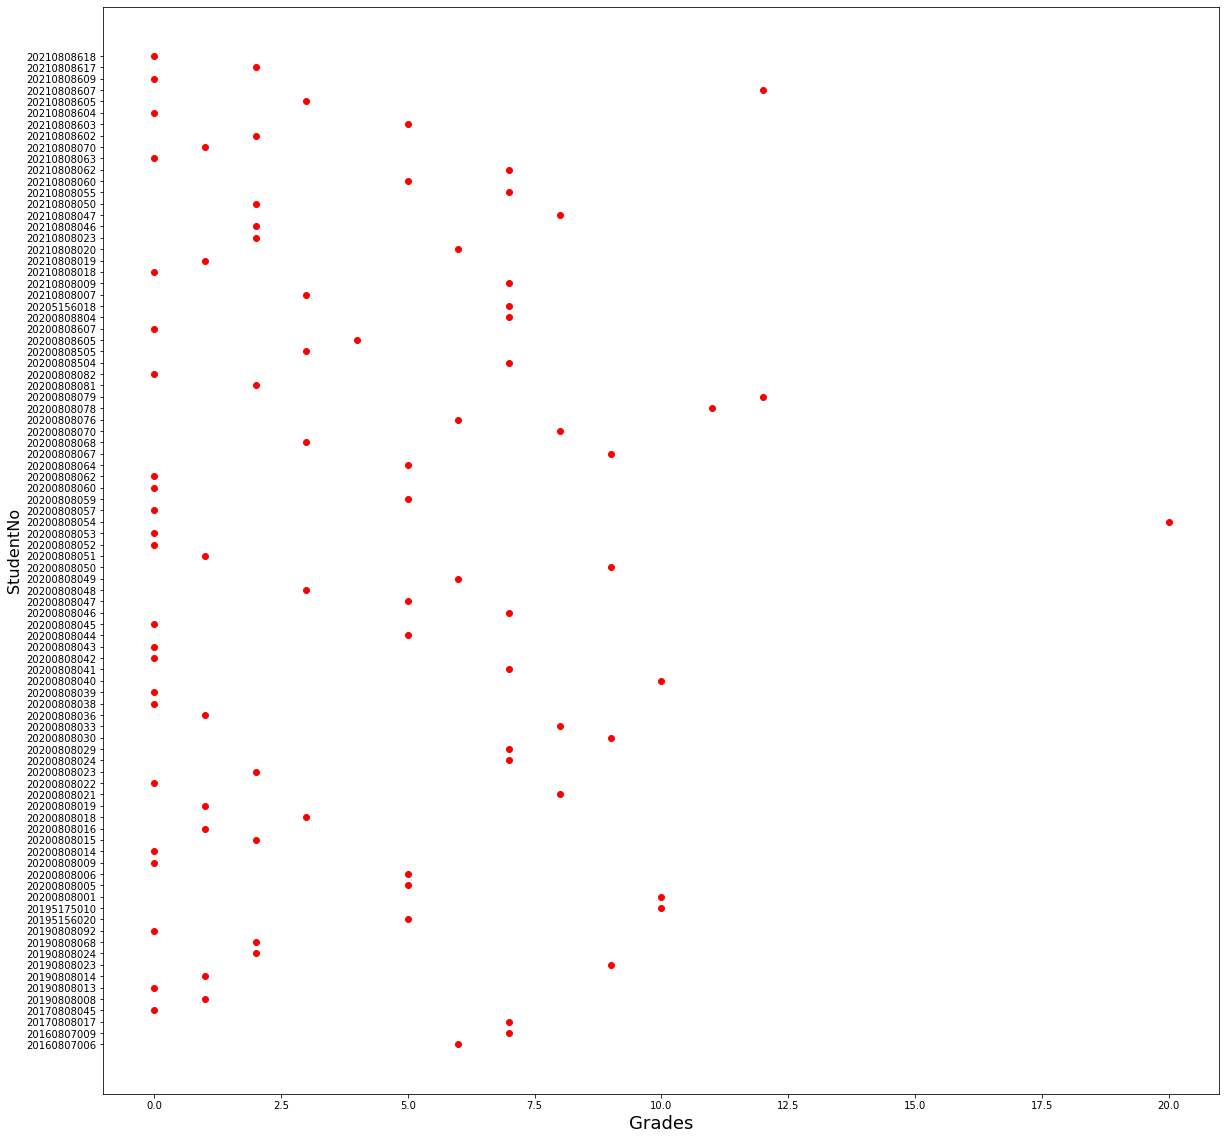

Number:    Encoder:    Original
20160807006 6 20
20160807009 7 20
20170808017 7 20
20170808045 0 0
20190808008 1 0
20190808013 0 0
20190808014 1 0
20190808023 9 20
20190808024 2 0
20190808068 2 0
20190808092 0 0
20195156020 5 20
20195175010 10 20
20200808001 10 20
20200808005 5 20
20200808006 5 0
20200808009 0 0
20200808014 0 0
20200808015 2 0
20200808016 1 0
20200808018 3 0
20200808019 1 0
20200808021 8 20
20200808022 0 0
20200808023 2 0
20200808024 7 20
20200808029 7 20
20200808030 9 20
20200808033 8 20
20200808036 1 0
20200808038 0 0
20200808039 0 0
20200808040 10 20
20200808041 7 20
20200808042 0 0
20200808043 0 0
20200808044 5 20
20200808045 0 0
20200808046 7 20
20200808047 5 20
20200808048 3 20
20200808049 6 20
20200808050 9 0
20200808051 1 0
20200808052 0 0
20200808053 0 0
20200808054 20 20
20200808057 0 0
20200808059 5 20
20200808060 0 0
20200808062 0 0
20200808064 5 0
20200808067 9 20
20200808068 3 0
20200808070 8 20
20200808076 6 0
20200808078 11 20
20200808079 12 20
20200808

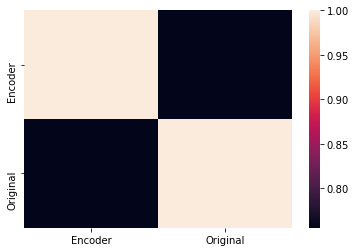

In [17]:
examQ5 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q5')
examQ5.fillna('', inplace=True)
examQ5.head()
answersQ5 = examQ5.iloc[:,2].values.tolist()

studentnoq5 = examQ5.iloc[:,0].values.tolist()
stno5 = []

for no in studentnoq5:
  stno5.append(str(no))
#print(answersQ1)
studentno =examQ5.iloc[:,0].values.tolist()

sentence_embeddings5 = model(answersQ5)
query5 = "Division of labor."
query_vec5 = model([query5])[0]
data5=[]
for sent in answersQ5:
  sim5 = cosine(query_vec5, model([sent])[0])
  grade = sim5*20
  if grade<0:
    grade = 0
  data5.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", sim5)

plt.figure(figsize=(20,20))
plt.plot(data5, stno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
originalgrades5 = examQ5.iloc[:,5].values.tolist()
grades5df = pd.DataFrame({'Encoder':data5,'Original':originalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(grades5df)) :
  print(stno5[i],grades5df.loc[i, "Encoder"], grades5df.loc[i, "Original"])
print(grades5df.corr())

sns.heatmap(grades5df.corr())

r25 = r2_score(originalgrades5,data5)
print("R2: ",r25)


**Roberta Large**

Sentence =  wealth increases by the division of labory , work ,job
State just use economy for the bridge , justice
 ; similarity =  0.3398566
Sentence =  Adam Smith believe that wealth was enhanced by division of labor.  ; similarity =  0.47922057
Sentence =  According to Smith division of labors is the key of increasing the wealth. ; similarity =  0.5303644
Sentence =  according to smith wealth icreases because of effecting of temprature pressure volume and liquid type. ; similarity =  0.11753636
Sentence =  Its for posion gas ; similarity =  0.06480301
Sentence =   ; similarity =  0.25863823
Sentence =  Wealth increases exponantial. The more you have money more you can earn. Because if you have enough money, you dont work for money, money works for you. ; similarity =  0.0382445
Sentence =  According to Smith wealth increases by division of labor. ; similarity =  0.53889817
Sentence =  Wealth increases if the people get the pay of their works. ; similarity =  0.29841238
Sentence =  w

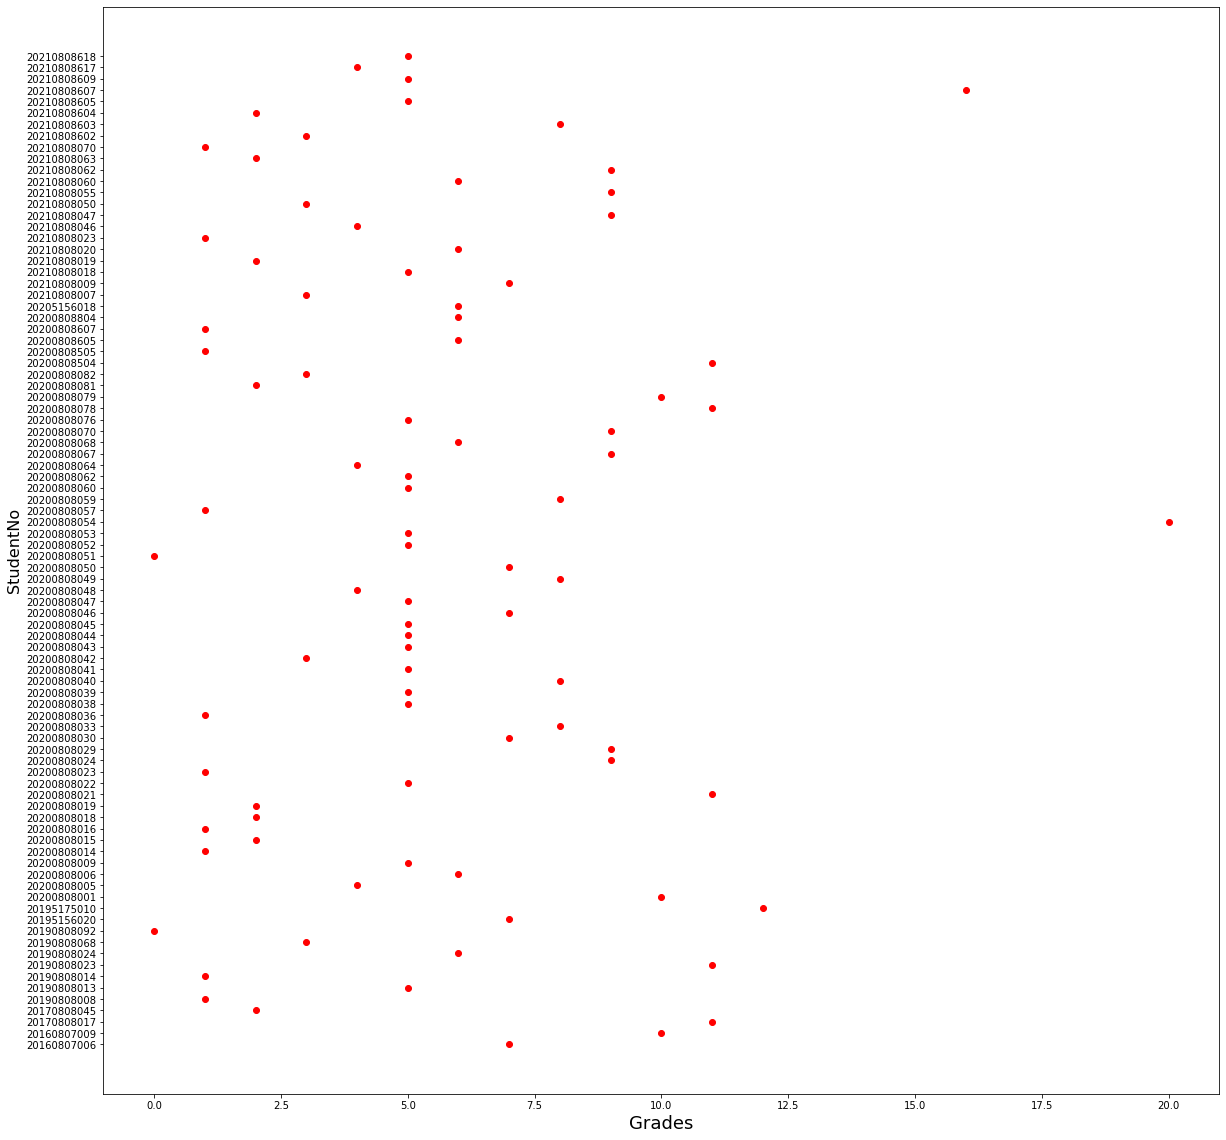

Number:    Encoder:    Original
20160807006 7 20
20160807009 10 20
20170808017 11 20
20170808045 2 0
20190808008 1 0
20190808013 5 0
20190808014 1 0
20190808023 11 20
20190808024 6 0
20190808068 3 0
20190808092 0 0
20195156020 7 20
20195175010 12 20
20200808001 10 20
20200808005 4 20
20200808006 6 0
20200808009 5 0
20200808014 1 0
20200808015 2 0
20200808016 1 0
20200808018 2 0
20200808019 2 0
20200808021 11 20
20200808022 5 0
20200808023 1 0
20200808024 9 20
20200808029 9 20
20200808030 7 20
20200808033 8 20
20200808036 1 0
20200808038 5 0
20200808039 5 0
20200808040 8 20
20200808041 5 20
20200808042 3 0
20200808043 5 0
20200808044 5 20
20200808045 5 0
20200808046 7 20
20200808047 5 20
20200808048 4 20
20200808049 8 20
20200808050 7 0
20200808051 0 0
20200808052 5 0
20200808053 5 0
20200808054 20 20
20200808057 1 0
20200808059 8 20
20200808060 5 0
20200808062 5 0
20200808064 4 0
20200808067 9 20
20200808068 6 0
20200808070 9 20
20200808076 5 0
20200808078 11 20
20200808079 10 20
20200

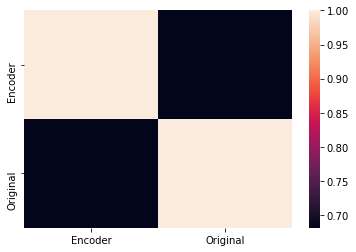

In [18]:
examQ5 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q5')
examQ5.fillna('', inplace=True)
examQ5.head()
answersQ5 = examQ5.iloc[:,2].values.tolist()
originalgrades5 = examQ5.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
tquery5 = "Division of labor."
tquery_vec5 = tmodel.encode(([tquery5])[0])
tdata5 = []



tstudentnoq5 = examQ5.iloc[:,0].values.tolist()
tstno5 = []

for no in tstudentnoq5:
  tstno5.append(str(no))


for sent in answersQ5:
  tsim5 = cosine(tquery_vec5, tmodel.encode(([sent])[0]))
  tgrade5 = tsim5*20
  if tgrade5<0:
    tgrade5 = 0    
  tdata5.append(round(tgrade5))
  print("Sentence = ", sent, "; similarity = ", tsim5)

plt.figure(figsize=(20,20))
plt.plot(tdata5, tstno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

tgradesdf5 = pd.DataFrame({'Encoder':tdata5,'Original':originalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(tgradesdf5)) :
  print(tstno5[i],tgradesdf5.loc[i, "Encoder"], tgradesdf5.loc[i, "Original"])
print(tgradesdf5.corr())

sns.heatmap(tgradesdf5.corr())
#R-Squared
tr25 = r2_score(originalgrades5,tdata5)
print("R2: ",tr25)
print("T-Test Result: ",stats.ttest_ind(originalgrades5,tdata5))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(tgradesdf5)

**Bert Base**

Sentence =  wealth increases by the division of labory , work ,job
State just use economy for the bridge , justice
 ; similarity =  0.40346214
Sentence =  Adam Smith believe that wealth was enhanced by division of labor.  ; similarity =  0.5816151
Sentence =  According to Smith division of labors is the key of increasing the wealth. ; similarity =  0.3982161
Sentence =  according to smith wealth icreases because of effecting of temprature pressure volume and liquid type. ; similarity =  0.46375278
Sentence =  Its for posion gas ; similarity =  0.4419247
Sentence =   ; similarity =  0.49222398
Sentence =  Wealth increases exponantial. The more you have money more you can earn. Because if you have enough money, you dont work for money, money works for you. ; similarity =  0.27616984
Sentence =  According to Smith wealth increases by division of labor. ; similarity =  0.5292558
Sentence =  Wealth increases if the people get the pay of their works. ; similarity =  0.30606195
Sentence =  wi

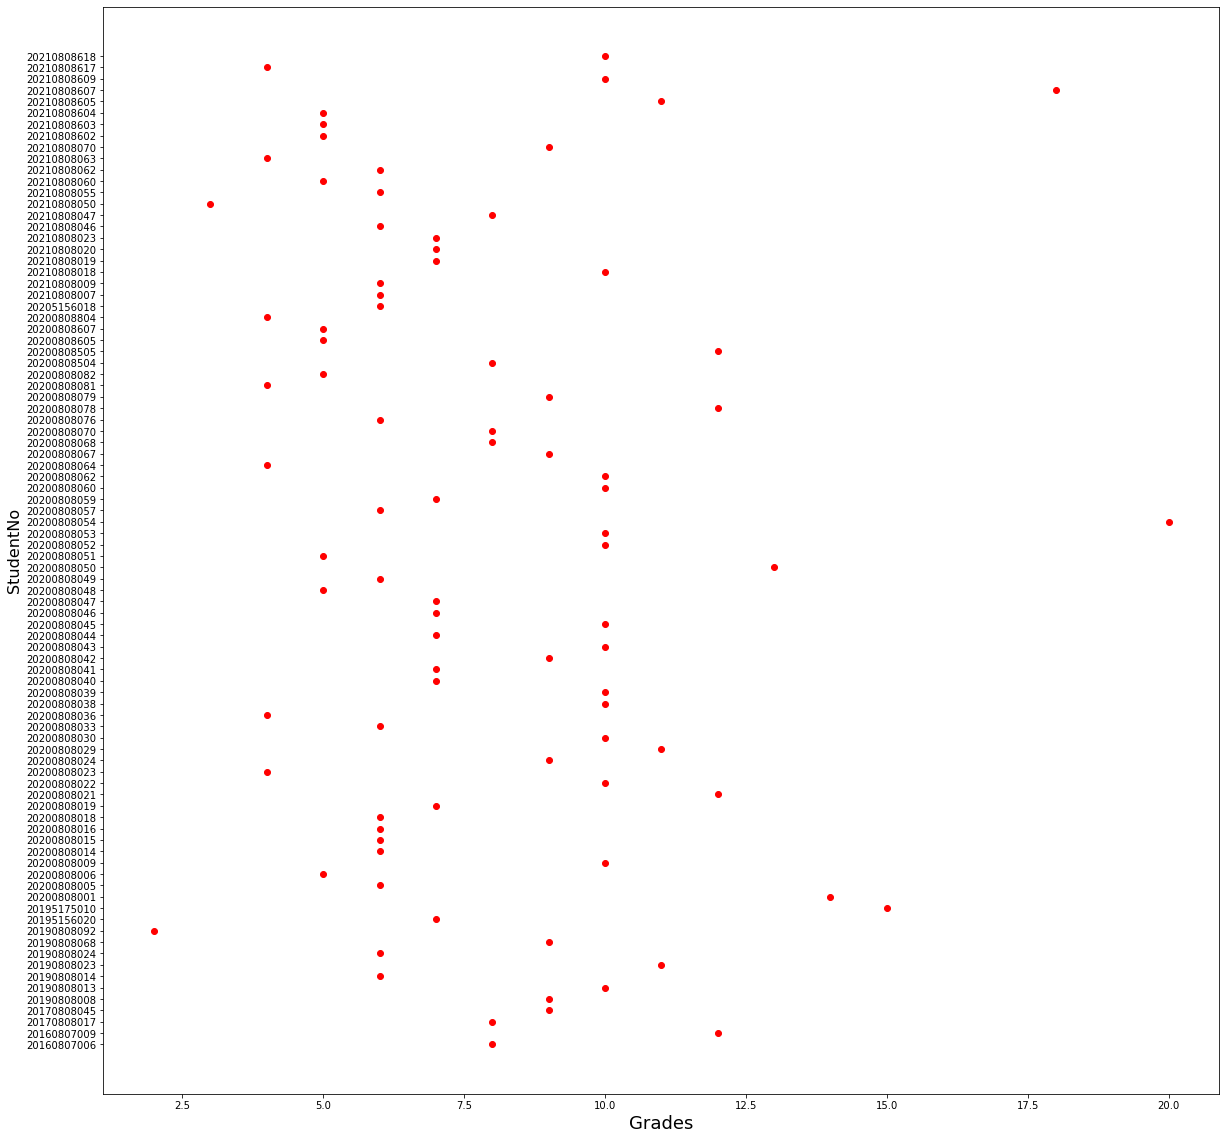

Number:    Encoder:    Original
20160807006 8 20
20160807009 12 20
20170808017 8 20
20170808045 9 0
20190808008 9 0
20190808013 10 0
20190808014 6 0
20190808023 11 20
20190808024 6 0
20190808068 9 0
20190808092 2 0
20195156020 7 20
20195175010 15 20
20200808001 14 20
20200808005 6 20
20200808006 5 0
20200808009 10 0
20200808014 6 0
20200808015 6 0
20200808016 6 0
20200808018 6 0
20200808019 7 0
20200808021 12 20
20200808022 10 0
20200808023 4 0
20200808024 9 20
20200808029 11 20
20200808030 10 20
20200808033 6 20
20200808036 4 0
20200808038 10 0
20200808039 10 0
20200808040 7 20
20200808041 7 20
20200808042 9 0
20200808043 10 0
20200808044 7 20
20200808045 10 0
20200808046 7 20
20200808047 7 20
20200808048 5 20
20200808049 6 20
20200808050 13 0
20200808051 5 0
20200808052 10 0
20200808053 10 0
20200808054 20 20
20200808057 6 0
20200808059 7 20
20200808060 10 0
20200808062 10 0
20200808064 4 0
20200808067 9 20
20200808068 8 0
20200808070 8 20
20200808076 6 0
20200808078 12 20
2020080807

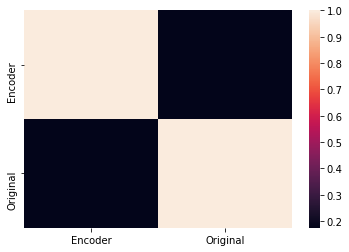

In [19]:
examQ5 = pd.read_excel("NSexam.xlsx",sheet_name = 'Q5')
examQ5.fillna('', inplace=True)
examQ5.head()
answersQ5 = examQ5.iloc[:,2].values.tolist()
originalgrades5 = examQ5.iloc[:,5].values.tolist()
#For roberta large
#tsentence_embeddings = tmodel(answersQ1)
t2query5 = "Division of labor."
t2query_vec5 = tmodel2.encode(([t2query5])[0])
t2data5 = []



t2studentnoq5 = examQ5.iloc[:,0].values.tolist()
t2stno5 = []

for no in t2studentnoq5:
  t2stno5.append(str(no))


for sent in answersQ5:
  t2sim5 = cosine(t2query_vec5, tmodel2.encode(([sent])[0]))
  t2grade5 = t2sim5*20
  if t2grade5<0:
    t2grade5 = 0    
  t2data5.append(round(t2grade5))
  print("Sentence = ", sent, "; similarity = ", t2sim5)

plt.figure(figsize=(20,20))
plt.plot(t2data5, t2stno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()

t2gradesdf5 = pd.DataFrame({'Encoder':t2data5,'Original':originalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(t2gradesdf5)) :
  print(t2stno4[i],t2gradesdf5.loc[i, "Encoder"], t2gradesdf5.loc[i, "Original"])
print(t2gradesdf5.corr())

sns.heatmap(t2gradesdf5.corr())
#R-Squared
t2r25 = r2_score(originalgrades5,t2data5)
print("R2: ",t2r25)
print("T-Test Result: ",stats.ttest_ind(originalgrades5,t2data5))
"""
linearmodel = LinearRegression()
X, y = gradesdf[["Encoder"]], gradesdf.Original
linearmodel.fit(X, y)
r_squared = linearmodel.score(X, y)
print("R-Squared: ",r_squared)
"""
"""
cf_matrix = confusion_matrix(data,originalgrades)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)
"""
print(t2gradesdf5)

*Total of Midterm*

    SumOriginal  SumEncoder  RobertaLargeSum  BertBaseSum  Ensembled
0            60          30               44           50         41
1            36          46               53           65         55
2            71          53               61           65         60
3            32          34               50           65         50
4            30          32               40           62         45
..          ...         ...              ...          ...        ...
83           16          30               46           58         45
84           60          58               61           72         64
85           28          40               49           62         50
86           42          45               54           58         52
87           10          38               52           66         52

[88 rows x 5 columns]
                 SumOriginal  SumEncoder  RobertaLargeSum  BertBaseSum  \
SumOriginal         1.000000    0.724543         0.669918     0.564420   
S

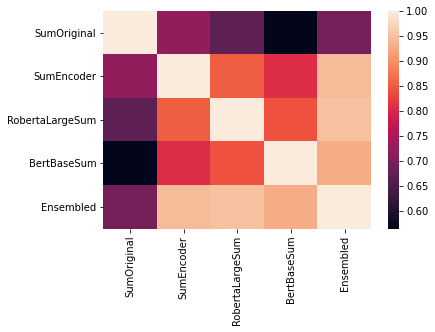

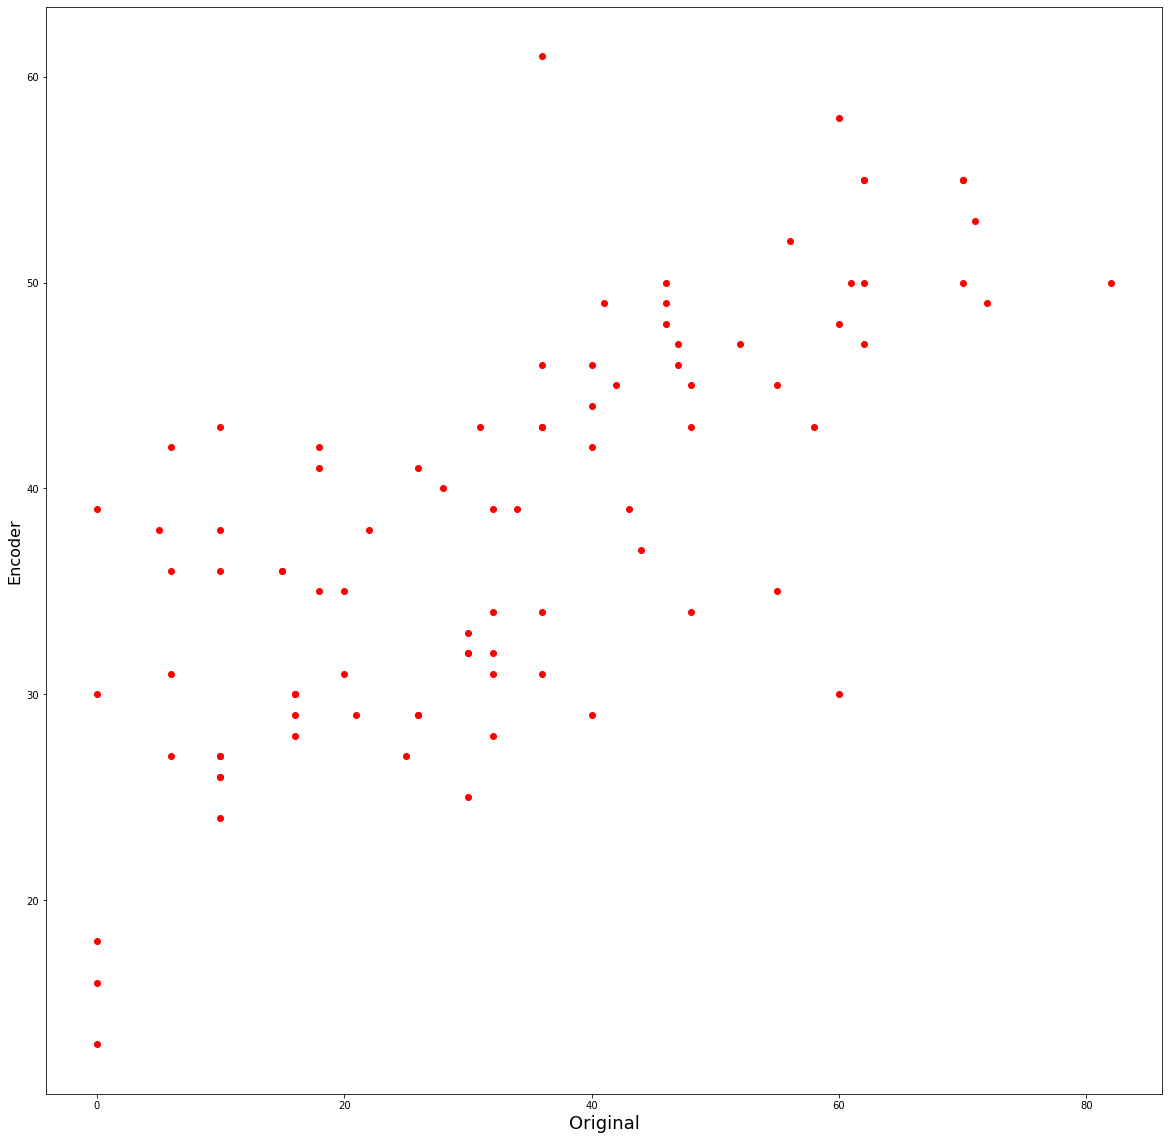

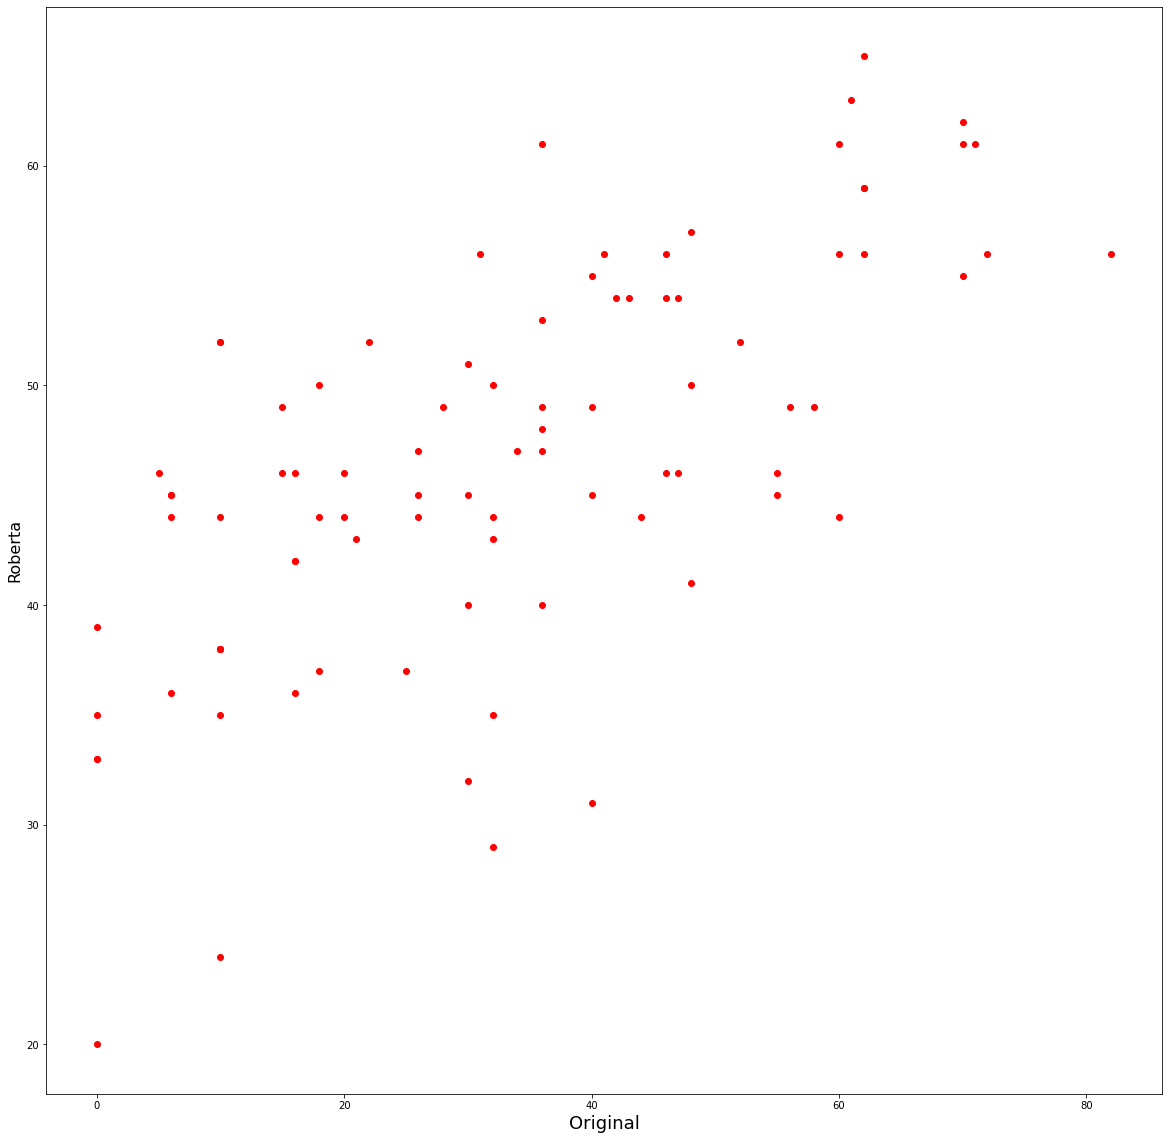

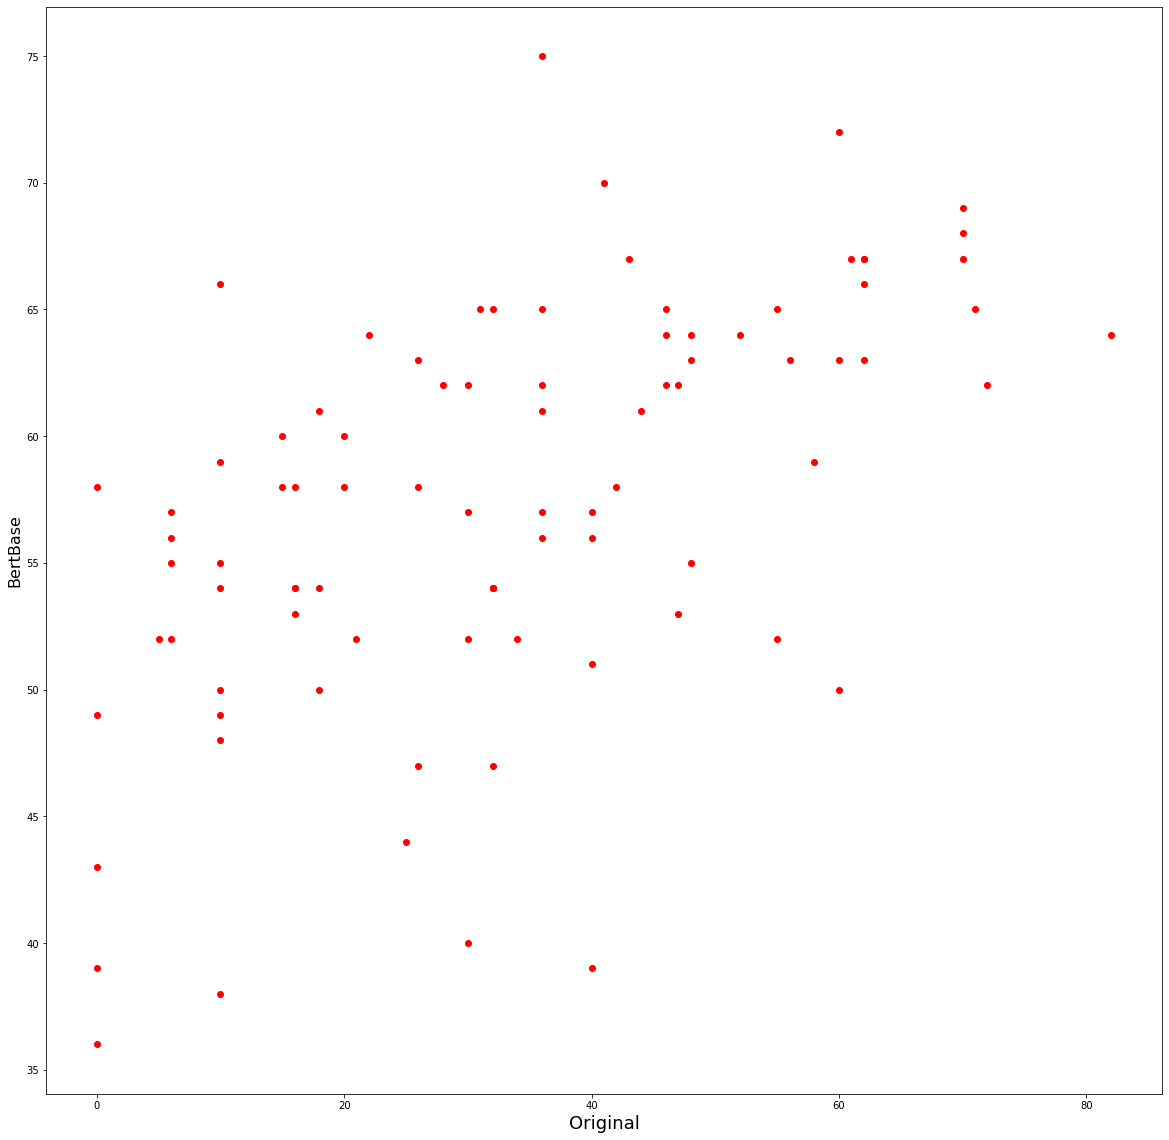

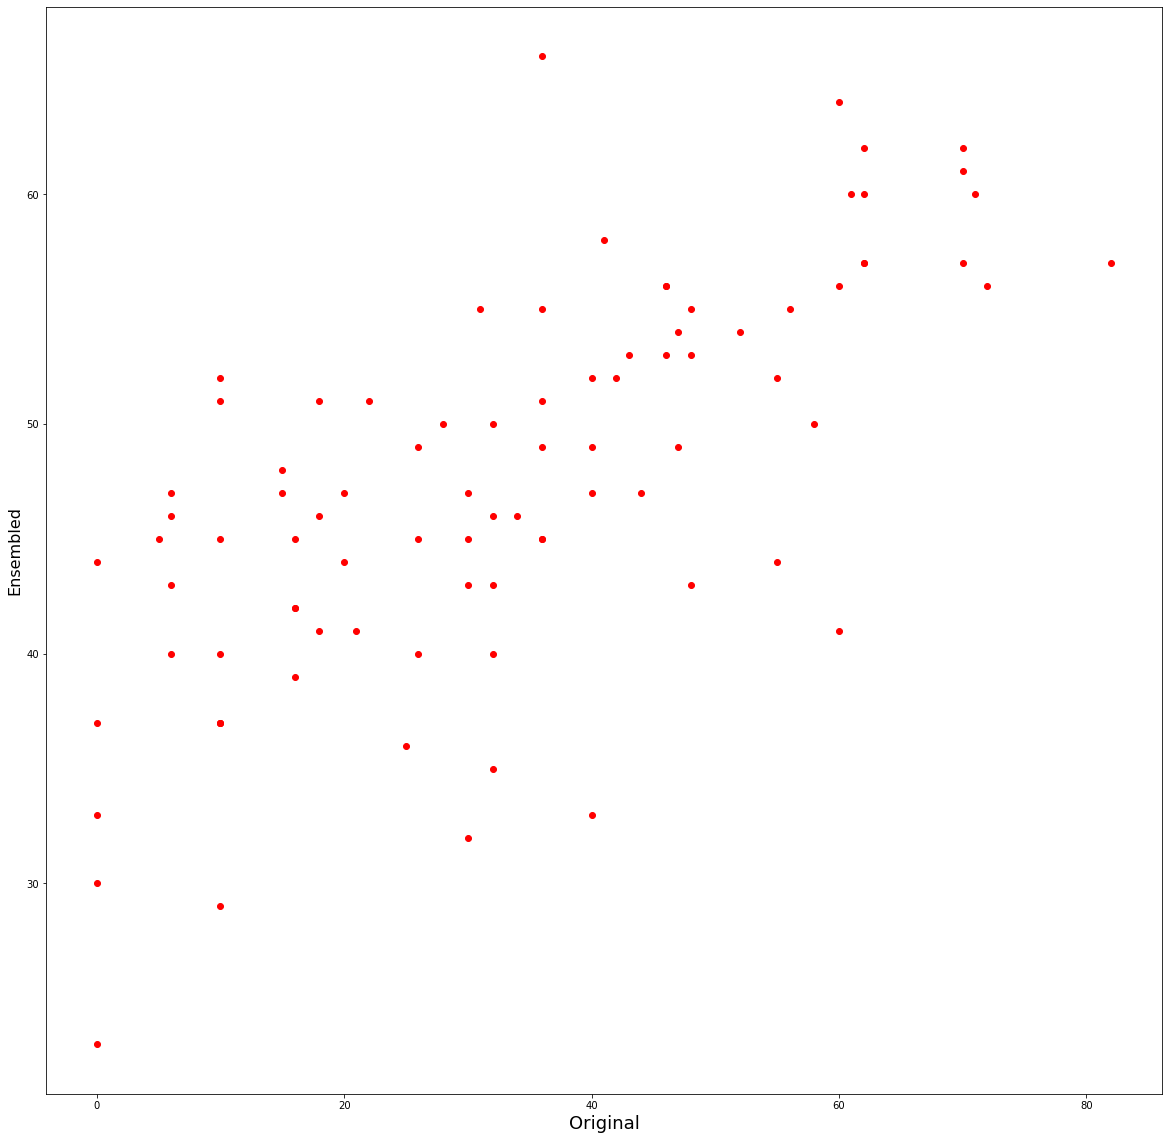

original [1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0]
use [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
roberta [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
bert [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [45]:
from scipy.optimize import curve_fit
from matplotlib import pyplot
from numpy import arange
#print(encodersum)
sumencoder = [data,data2,data3,data4,data5]
midtermsumencoder = [sum(x) for x in zip(*sumencoder)]
encodersum =pd.DataFrame({'SumEncoder': midtermsumencoder})
usefinal = []


#print(robertasum)
tsumencoder = [tdata,tdata2,tdata3,tdata4,tdata5]
tmidtermsumencoder = [sum(x) for x in zip(*tsumencoder)]
tencodersum =pd.DataFrame({'SumEncoder': tmidtermsumencoder})


#print(bertbasesum)
t2sumencoder = [t2data,t2data2,t2data3,t2data4,t2data5]
t2midtermsumencoder = [sum(x) for x in zip(*t2sumencoder)]
t2encodersum =pd.DataFrame({'SumEncoder': t2midtermsumencoder})


sumoriginal = [originalgrades,originalgrades2,originalgrades3,originalgrades4,originalgrades5]
midtermsumoriginal = [sum(x) for x in zip(*sumoriginal)]
midtermsum =pd.DataFrame({'SumMidterm': midtermsumoriginal})
#print(midtermsum)

originalfinal = []



ensembled = [midtermsumencoder,tmidtermsumencoder,t2midtermsumencoder]
ensembledsum = [sum(x) for x in zip(*ensembled)]
ensembledsum1 = []
for score in ensembledsum:
    ensembledsum1.append(round(score/3))

sumensembled = pd.DataFrame({'Ensembled':ensembledsum1})


midtermresult = pd.DataFrame({'SumOriginal':midtermsumoriginal,'SumEncoder':midtermsumencoder,'RobertaLargeSum':tmidtermsumencoder,'BertBaseSum':t2midtermsumencoder,'Ensembled':ensembledsum1})
print(midtermresult)
print(midtermresult.corr())
sns.heatmap(midtermresult.corr())

rmidterm = r2_score(midtermresult.SumOriginal,midtermresult.SumEncoder)
print("R2 score for USE: ",rmidterm)
print("T-Test Result for USE: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.SumEncoder))

rmidtermroberta = r2_score(midtermresult.SumOriginal,midtermresult.RobertaLargeSum)
print("R2 score for Roberta Large: ",rmidtermroberta)
print("T-Test Result for Roberta Large: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.RobertaLargeSum))

rmidtermbertbase = r2_score(midtermresult.SumOriginal,midtermresult.BertBaseSum)
print("R2 score for Bert Base: ",rmidtermbertbase)
print("T-Test Result for Bert Base: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.BertBaseSum))

rmidtermensembled = r2_score(midtermresult.SumOriginal,midtermresult.Ensembled)
print("R2 score for Ensembled: ",rmidtermensembled)
print("T-Test Result for Ensembled: ",stats.ttest_ind(midtermresult.SumOriginal,midtermresult.Ensembled))

meandf = midtermresult.mean()
print("Mean of each column is: ",meandf)

stdevdf = midtermresult.std()
print("Standart Deviation of each column is:\n ",stdevdf)

"""
midtermresult = pd.concat[encodersum,midtermsum]
print(midtermresult.head())
sns.heatmap(midtermresult.corr())
"""
print(midtermresult)

plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.SumEncoder, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('Encoder', fontsize=16)
plt.show()

plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.RobertaLargeSum, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('Roberta', fontsize=16)
plt.show()

plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.BertBaseSum, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('BertBase', fontsize=16)
plt.show()

plt.figure(figsize=(20,20))
plt.plot(midtermresult.SumOriginal, midtermresult.Ensembled, 'ro')
plt.xlabel('Original', fontsize=18)
plt.ylabel('Ensembled', fontsize=16)
plt.show()
"""
#3 modelin ortalaması vs original
normalized = []
for x in midtermresult.SumEncoder:
    normalized.append(round((x-13)*1.7))

def test(x, a, b):
    return a*x +b
 
param, param_cov = curve_fit(test, midtermresult.SumOriginal, normalized)
ans = param[0]*midtermresult.SumOriginal +param[1]



plt.plot(midtermresult.SumOriginal, normalized, 'o', color ='red', label ="data")
plt.plot(midtermresult.SumOriginal, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()


print(normalized)
"""

original = []
for x in midtermresult.SumOriginal:
    if x<=33:
        original.append(0)
    if 33<x<66:
        original.append(1)
    if x>=66:
        original.append(2)

print("original",original)

use = []
for x in midtermresult.SumEncoder:
    if x<=33:
        use.append(0)
    if 33<x<66:
        use.append(1)
    if x>=66:
        use.append(2)

print("use",use)

roberta = []
for x in midtermresult.RobertaLargeSum:
    if x<=33:
        roberta.append(0)
    if 33<x<66:
        roberta.append(1)
    if x>=66:
        roberta.append(2)

print("roberta",roberta)

bert = []
for x in midtermresult.BertBaseSum:
    if x<=33:
        bert.append(0)
    if 33<x<66:
        bert.append(1)
    if x>=66:
        bert.append(2)

print("bert",bert)

ensembled = []
for x in midtermresult.Ensembled:
    if x<=33:
        ensembled.append(0)
    if 33<x<66:
        ensembled.append(1)
    if x>=66:
        ensembled.append(2)

print("ensembled",ensembled)



**Graphs**

labeled:      Original  USE  Roberta  Bert  Ensemble
0          1    0        1     1         1
1          1    1        1     1         1
2          2    1        1     1         1
3          0    1        1     1         1
4          0    0        1     1         1
..       ...  ...      ...   ...       ...
83         0    0        1     1         1
84         1    1        1     2         1
85         0    1        1     1         1
86         1    1        1     1         1
87         0    1        1     2         1

[88 rows x 5 columns]


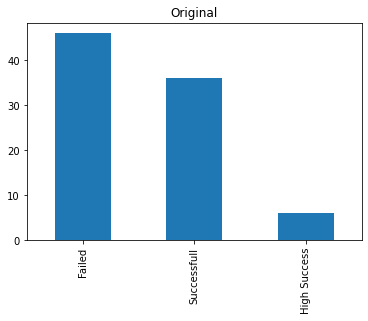

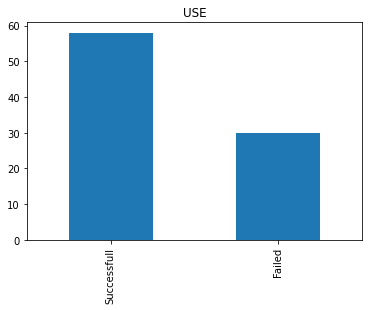

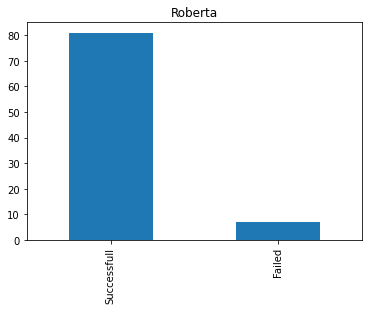

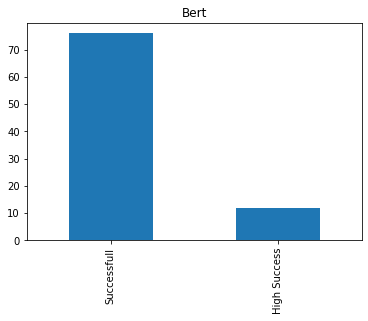

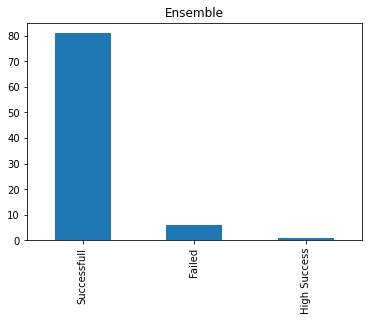

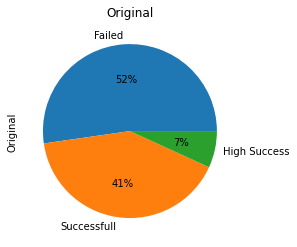

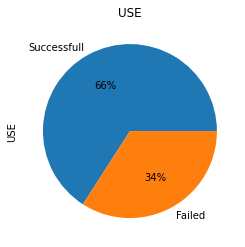

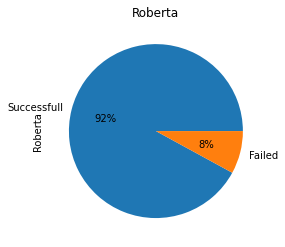

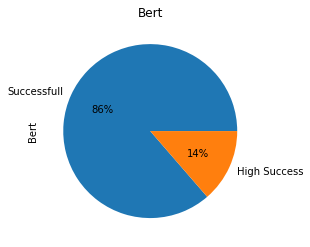

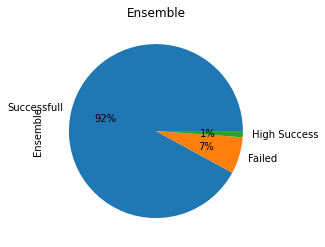

In [51]:
labeled = pd.DataFrame({"Original":original,"USE":use,"Roberta":roberta,"Bert":bert,"Ensemble":ensembled})
print("labeled: ",labeled)

labeled.replace({0:"Failed",1:"Successfull",2:"High Success"},inplace=True)
color = ['red','blue','yellow','purple','pink']
#bar
labeled.Original.value_counts().plot.bar(title="Original")
plt.show()

labeled.USE.value_counts().plot.bar(title="USE")
plt.show()

labeled.Roberta.value_counts().plot.bar(title="Roberta")
plt.show()

labeled.Bert.value_counts().plot.bar(title="Bert")
plt.show()

labeled.Ensemble.value_counts().plot.bar(title="Ensemble")
plt.show()


#pie
labeled.Original.value_counts().plot.pie(title="Original", autopct='%1.0f%%')
plt.show()

labeled.USE.value_counts().plot.pie(title="USE", autopct='%1.0f%%')
plt.show()

labeled.Roberta.value_counts().plot.pie(title="Roberta", autopct='%1.0f%%')
plt.show()

labeled.Bert.value_counts().plot.pie(title="Bert", autopct='%1.0f%%')
plt.show()

labeled.Ensemble.value_counts().plot.pie(title="Ensemble", autopct='%1.0f%%')
plt.show()

***Final***

**Q1**

Sentence =  The founding of the steam engine started the industrial revoulution because when steam engine found, european countries like england started to manufacture things faster then normal methods like manufacturing with hand. Factories opened, and in war and other industries rised. ; similarity =  0.66811883
Sentence =  The steam engine is considered the starting point of the industrial revolution. Thanks to the steam engine, machines have been developed in many textile fields (power loompower loom, spinning mule) ; similarity =  0.6987427
Sentence =  Steam engine does not get tired and don't ask for salary. And provided transportation faster and cheaper. ; similarity =  0.38523805
Sentence =    ; similarity =  -0.0438053
Sentence =  Steam Engine. With this invention, the foundations of the industrial revolution were laid.Transportation could be provided much cheaper and faster than before.Thanks to the industrial revolution, many more things have been opened. ; similarity =  0.7

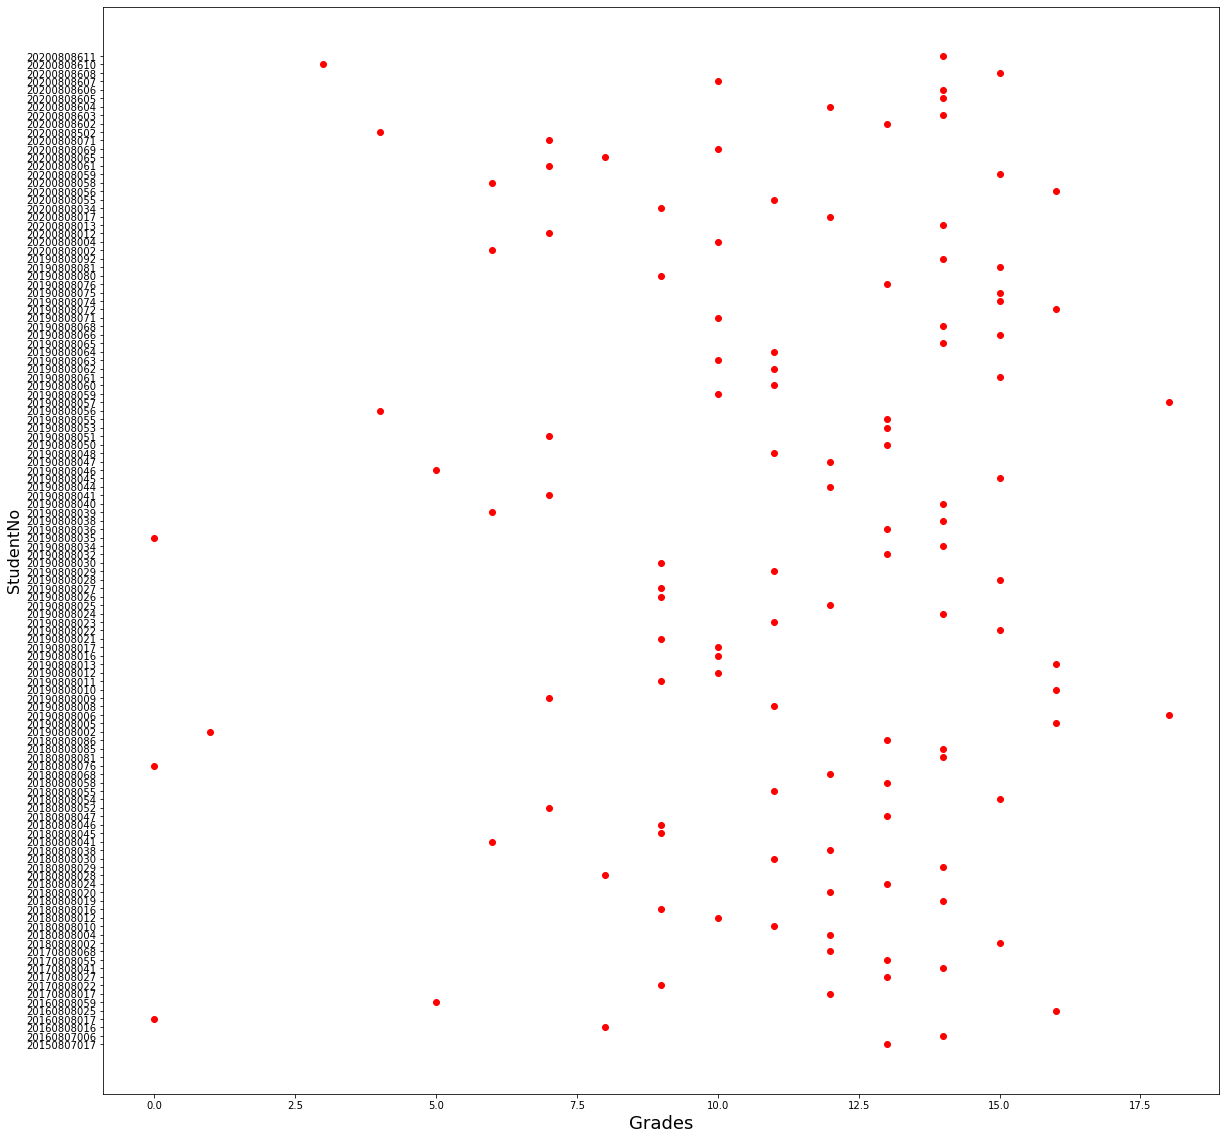

Number:    Encoder:    Original
20150807017 13 20
20160807006 14 20
20160808016 8 10
20160808017 0 0
20160808025 16 10
20160808059 5 10
20170808017 12 20
20170808022 9 20
20170808027 13 20
20170808041 14 20
20170808055 13 20
20170808068 12 10
20180808002 15 20
20180808004 12 20
20180808010 11 20
20180808012 10 20
20180808016 9 10
20180808019 14 20
20180808020 12 20
20180808024 13 20
20180808028 8 20
20180808029 14 20
20180808030 11 20
20180808038 12 20
20180808041 6 20
20180808045 9 10
20180808046 9 20
20180808047 13 20
20180808052 7 0
20180808054 15 20
20180808055 11 20
20180808058 13 20
20180808068 12 20
20180808076 0 0
20180808081 14 20
20180808085 14 20
20180808086 13 20
20190808002 1 10
20190808005 16 20
20190808006 18 10
20190808008 11 20
20190808009 7 10
20190808010 16 20
20190808011 9 20
20190808012 10 10
20190808013 16 20
20190808016 10 0
20190808017 10 20
20190808021 9 10
20190808022 15 20
20190808023 11 10
20190808024 14 0
20190808025 12 20
20190808026 9 10
20190808027 9 20


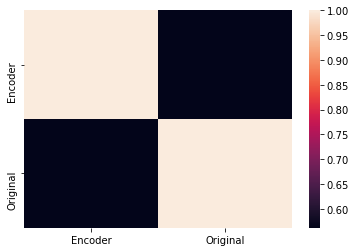

In [ ]:



finalexamQ1 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q1')
finalexamQ1.fillna('', inplace=True)
finalexamQ1.head()
finalanswersQ1 = finalexamQ1.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings = model(finalanswersQ1)
finalquery = 'Invention of the steam engine started the industrial revolution.'
finalquery_vec = model([finalquery])[0]
finaldata=[]
for sent in finalanswersQ1:
  finalsim = cosine(finalquery_vec, model([sent])[0])
  grade = finalsim*20
  if grade<0:
    grade = 0
  finaldata.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim)

finalstudentno =finalexamQ1.iloc[:,0].values.tolist()
finalstno = []

for no in finalstudentno:
  finalstno.append(str(no))
#print(answersQ1)

plt.figure(figsize=(20,20))
plt.plot(finaldata, finalstno, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades = finalexamQ1.iloc[:,4].values.tolist()
finalgradesdf = pd.DataFrame({'Encoder':finaldata,'Original':finaloriginalgrades})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf)) :
  print(finalstno[i],finalgradesdf.loc[i, "Encoder"], finalgradesdf.loc[i, "Original"])
print(finalgradesdf.corr())
sns.heatmap(finalgradesdf.corr())

r2f1 = r2_score(finaloriginalgrades,finaldata)
print("R2: ",r2f1)

**Q2**

Sentence =  Computer scientists working on stereochemistry because modeling and seeing atoms and molecules in computer is much easier then theorising and doing calculations without computer.  How they are working is they use computers to model and see little particles. And it can be used to use electron microscopes and other important tools.  ; similarity =  0.39845443
Sentence =  Stereochemistry is now not an remoted area of simple technological know-how and has turn out to be carefully related with many chemistry, scientific chemistry, polymer technological know-how, new substances engineering and plenty of different branches. laptop engineering is amongst them. With optical activation, the connection among laptop technological know-how and stereochemistry is growing ; similarity =  0.13982606
Sentence =  Because, we need virtualization of molecules. On computer we can virtualize molecule behavior. That is why computer scientist work on Steroochemistry. ; similarity =  0.29817414
Sen

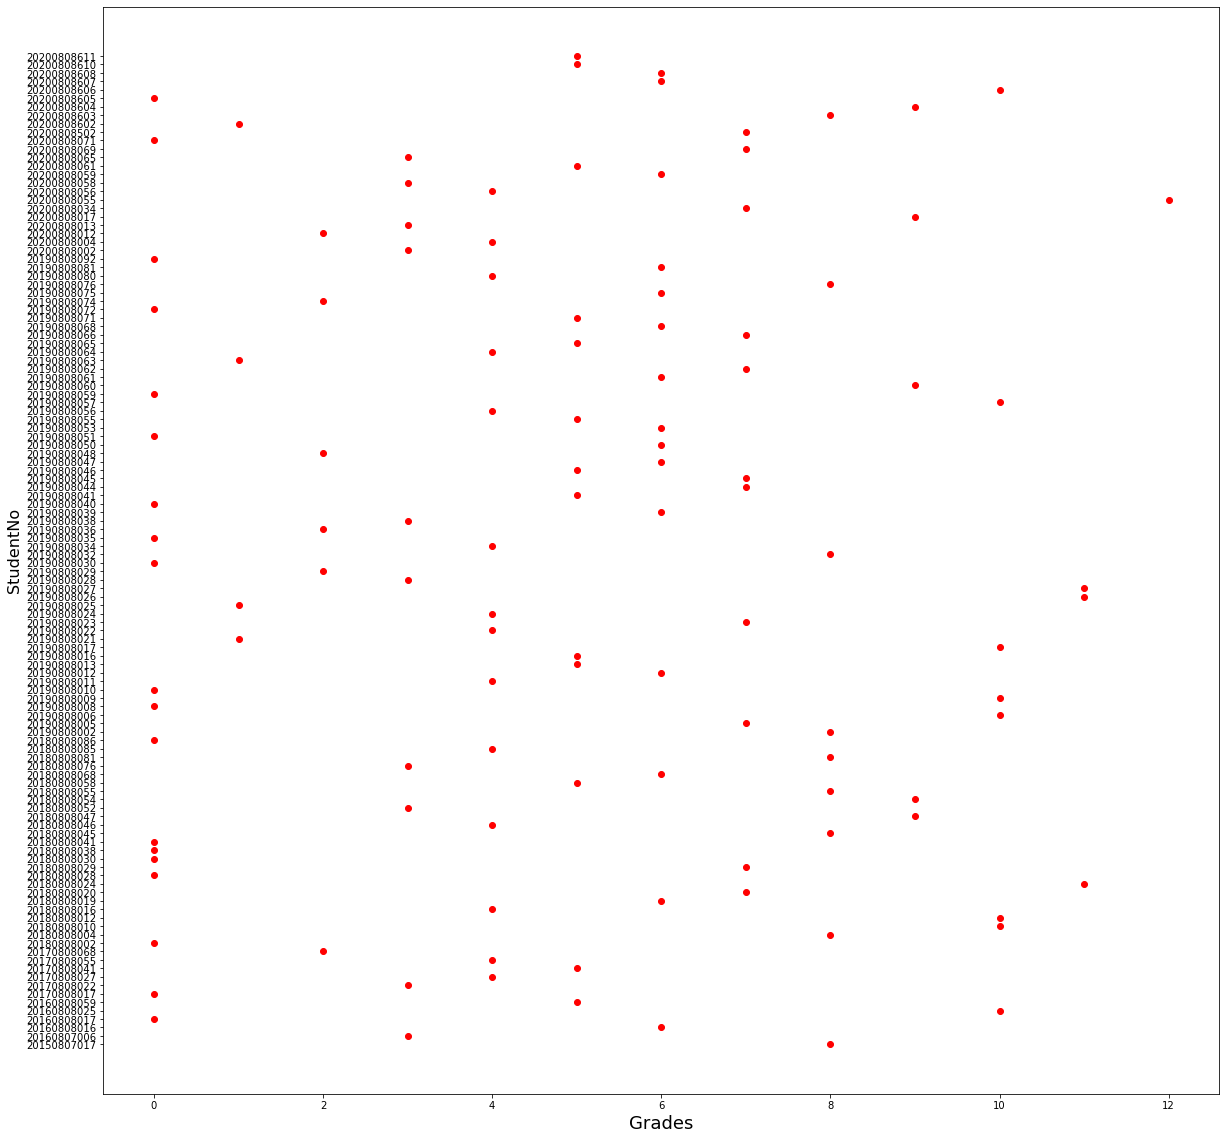

Number:    Encoder:    Original
20150807017 8 16
20160807006 3 0
20160808016 6 16
20160808017 0 0
20160808025 10 16
20160808059 5 8
20170808017 0 0
20170808022 3 8
20170808027 4 8
20170808041 5 8
20170808055 4 8
20170808068 2 0
20180808002 0 0
20180808004 8 20
20180808010 10 20
20180808012 10 20
20180808016 4 8
20180808019 6 0
20180808020 7 8
20180808024 11 20
20180808028 0 0
20180808029 7 16
20180808030 0 0
20180808038 0 0
20180808041 0 0
20180808045 8 16
20180808046 4 8
20180808047 9 16
20180808052 3 8
20180808054 9 16
20180808055 8 16
20180808058 5 16
20180808068 6 16
20180808076 3 0
20180808081 8 8
20180808085 4 16
20180808086 0 0
20190808002 8 8
20190808005 7 16
20190808006 10 8
20190808008 0 0
20190808009 10 8
20190808010 0 0
20190808011 4 0
20190808012 6 16
20190808013 5 8
20190808016 5 8
20190808017 10 20
20190808021 1 0
20190808022 4 8
20190808023 7 20
20190808024 4 8
20190808025 1 0
20190808026 11 16
20190808027 11 16
20190808028 3 8
20190808029 2 0
20190808030 0 0
2019080803

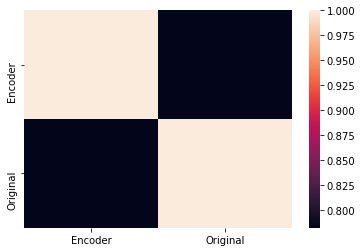

In [ ]:
finalexamQ2 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q2')
finalexamQ2.fillna('', inplace=True)
finalexamQ2.head()
finalanswersQ2 = finalexamQ2.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings2 = model(finalanswersQ2)
finalquery2 = '3D modeling of protein molecules structure. '
finalquery_vec2 = model([finalquery2])[0]
finaldata2=[]
for sent in finalanswersQ2:
  finalsim2 = cosine(finalquery_vec2, model([sent])[0])
  grade = finalsim2*20
  if grade<0:
    grade = 0
  finaldata2.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim2)

finalstudentno2 =finalexamQ2.iloc[:,0].values.tolist()
finalstno2 = []

for no in finalstudentno2:
  finalstno2.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata2, finalstno2, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades2 = finalexamQ2.iloc[:,3].values.tolist()
finalgradesdf2 = pd.DataFrame({'Encoder':finaldata2,'Original':finaloriginalgrades2})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf2)) :
  print(finalstno2[i],finalgradesdf2.loc[i, "Encoder"], finalgradesdf2.loc[i, "Original"])

print(finalgradesdf2.corr())

sns.heatmap(finalgradesdf2.corr())
r2f2 = r2_score(finaloriginalgrades2,finaldata2)
print("R2: ",r2f2)

**Q3**

Sentence =  Entropy is about randomness in things in universe. It helped calculations and manupilations of things in information era and helped development of most of the technologies. ; similarity =  0.44587213
Sentence =  nformation isn't always absolutely abstract. Because it's far in bodily methods to move records, this suggests that it'll act consistent with the legal guidelines of physics. As a result, it suggests that the electricity and records withinside the universe are interconnected.
We use records to arrange the universe and to lessen entropy, or disorder. But due to the fact records is saved in constrained stores, the antique one is deleted whenever new records arrives. and way to that it will increase entropy ; similarity =  0.42486516
Sentence =  Information entropy provide us how to transmit information with optimumly. That is important for working on information and transmit info. Comminication grow up. ; similarity =  0.30919716
Sentence =    ; similarity =  0.083035

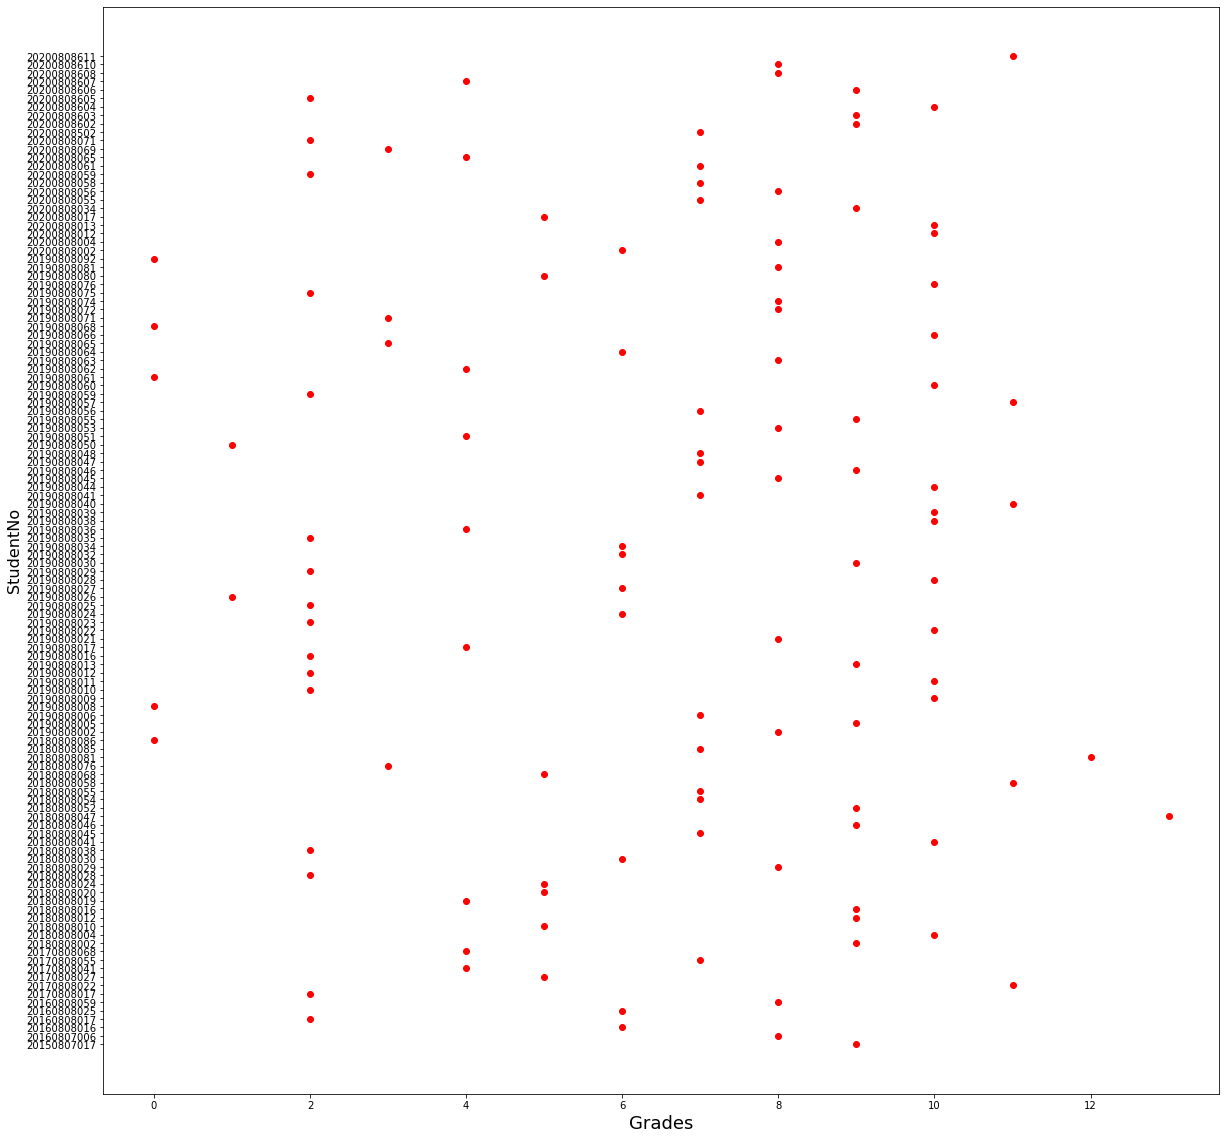

Number:    Encoder:    Original
20150807017 9 10
20160807006 8 10
20160808016 6 0
20160808017 2 0
20160808025 6 15
20160808059 8 10
20170808017 2 0
20170808022 11 10
20170808027 5 10
20170808041 4 15
20170808055 7 0
20170808068 4 0
20180808002 9 0
20180808004 10 10
20180808010 5 0
20180808012 9 15
20180808016 9 10
20180808019 4 0
20180808020 5 0
20180808024 5 0
20180808028 2 0
20180808029 8 10
20180808030 6 15
20180808038 2 0
20180808041 10 10
20180808045 7 10
20180808046 9 20
20180808047 13 20
20180808052 9 10
20180808054 7 15
20180808055 7 10
20180808058 11 10
20180808068 5 10
20180808076 3 10
20180808081 12 20
20180808085 7 0
20180808086 0 0
20190808002 8 0
20190808005 9 10
20190808006 7 0
20190808008 0 0
20190808009 10 10
20190808010 2 0
20190808011 10 0
20190808012 2 0
20190808013 9 0
20190808016 2 15
20190808017 4 10
20190808021 8 0
20190808022 10 10
20190808023 2 0
20190808024 6 0
20190808025 2 0
20190808026 1 0
20190808027 6 0
20190808028 10 0
20190808029 2 0
20190808030 9 0
20

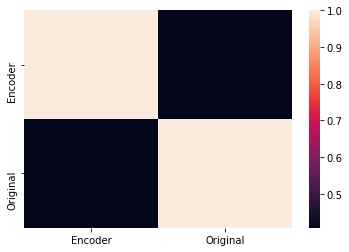

In [ ]:
finalexamQ3 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q3')
finalexamQ3.fillna('', inplace=True)
finalexamQ3.head()
finalanswersQ3 = finalexamQ3.iloc[:,2].values.tolist()




finalsentence_embeddings3 = model(finalanswersQ3)
finalquery3 = "Entropy measures randomness or disorder. Information gain increases with the increase in order. It measures how unlikely an event occurs. It is related with the probability of an event not occuring by chance."
finalquery_vec3 = model([finalquery3])[0]
finaldata3=[]
for sent in finalanswersQ3:
  finalsim3 = cosine(finalquery_vec3, model([sent])[0])
  grade = finalsim3*20
  if grade<0:
    grade = 0
  finaldata3.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim3)

finalstudentno3 =finalexamQ3.iloc[:,0].values.tolist()
finalstno3 = []

for no in finalstudentno3:
  finalstno3.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata3, finalstno3, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades3 = finalexamQ3.iloc[:,3].values.tolist()
finalgradesdf3 = pd.DataFrame({'Encoder':finaldata3,'Original':finaloriginalgrades3})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf3)) :
  print(finalstno3[i],finalgradesdf3.loc[i, "Encoder"], finalgradesdf3.loc[i, "Original"])

print(finalgradesdf3.corr())
sns.heatmap(finalgradesdf3.corr())
r2f3 = r2_score(finaloriginalgrades3,finaldata3)
print("R2: ",r2f3)

**Q4**

Sentence =  If we show north in out switch that would be enough to determine other directions. For determine where is north, we need to electromagnetise a thin metal such as needle and put it in a frictionless place so one side can show north pole and other, south pole. ; similarity =  0.25529104
Sentence =  zaman yetmedi ( ; similarity =  -0.024103675
Sentence =   ; similarity =  0.03572412
Sentence =    ; similarity =  0.03572412
Sentence =  We can connect the 2 switches by creating an electric magnetic field between them. ; similarity =  0.38139856
Sentence =   ; similarity =  0.03572412
Sentence =   ; similarity =  0.03572412
Sentence =  One switch will show north-south another one east west  and we can achieve the by using magnets. ; similarity =  0.3717233
Sentence =  I place a key between east and north from east, west, north and south directions, and a key between west and south and use the magnetic field that they apply to each other. ; similarity =  0.17172097
Sentence =  Wit

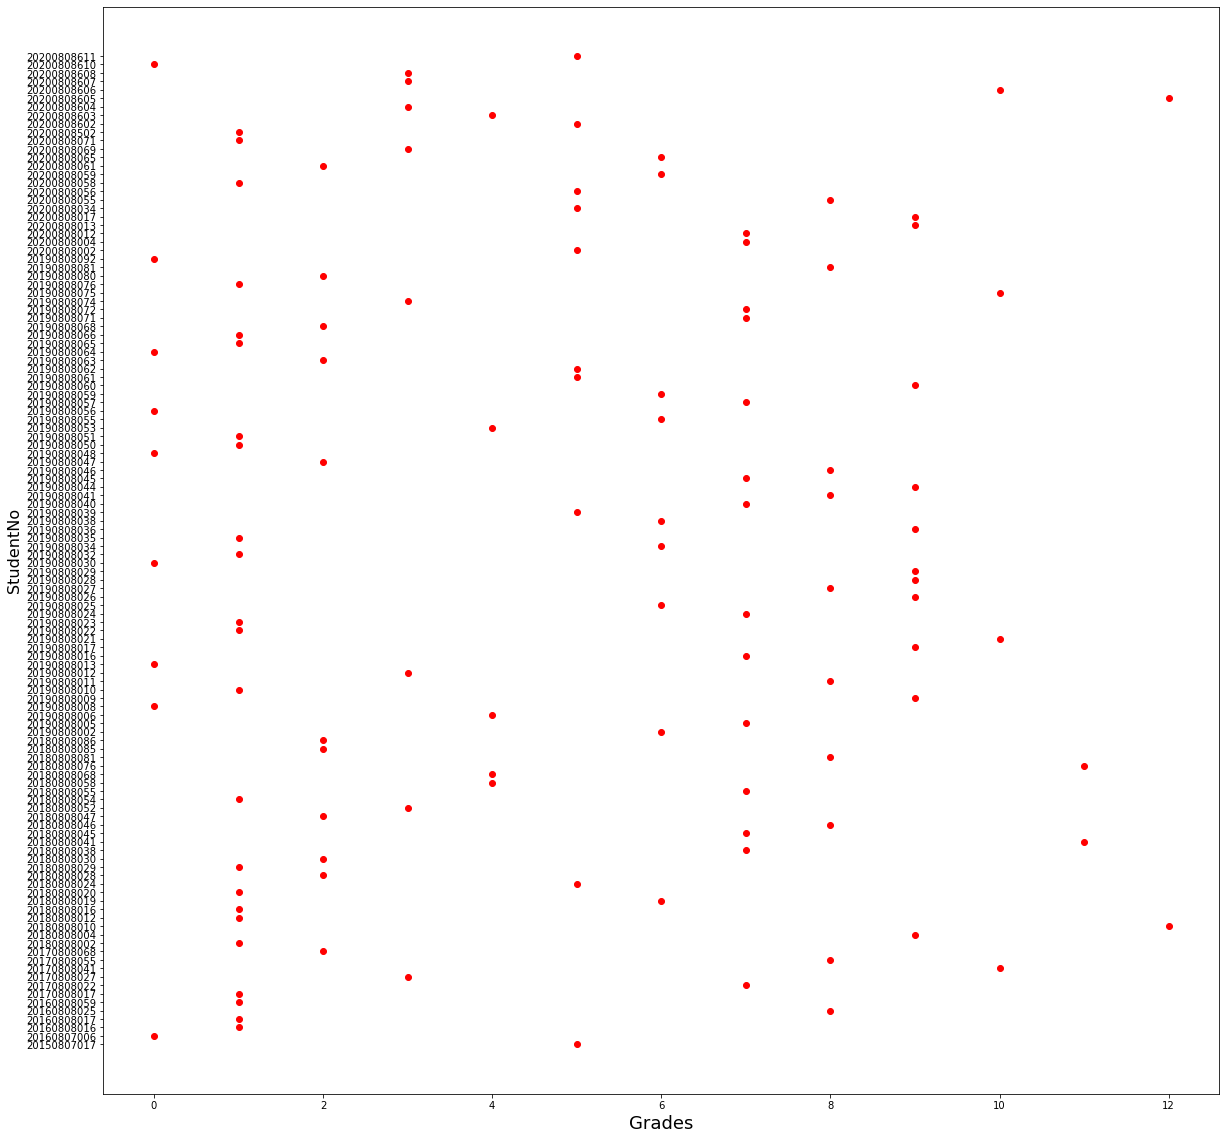

Number:    Encoder:    Original
20150807017 5 0
20160807006 0 0
20160808016 1 0
20160808017 1 0
20160808025 8 0
20160808059 1 0
20170808017 1 0
20170808022 7 0
20170808027 3 0
20170808041 10 20
20170808055 8 20
20170808068 2 10
20180808002 1 0
20180808004 9 10
20180808010 12 10
20180808012 1 0
20180808016 1 0
20180808019 6 10
20180808020 1 0
20180808024 5 0
20180808028 2 0
20180808029 1 0
20180808030 2 7
20180808038 7 10
20180808041 11 20
20180808045 7 10
20180808046 8 10
20180808047 2 0
20180808052 3 0
20180808054 1 0
20180808055 7 7
20180808058 4 0
20180808068 4 10
20180808076 11 10
20180808081 8 10
20180808085 2 10
20180808086 2 0
20190808002 6 10
20190808005 7 10
20190808006 4 10
20190808008 0 0
20190808009 9 0
20190808010 1 0
20190808011 8 10
20190808012 3 10
20190808013 0 7
20190808016 7 0
20190808017 9 10
20190808021 10 10
20190808022 1 0
20190808023 1 0
20190808024 7 0
20190808025 6 10
20190808026 9 10
20190808027 8 10
20190808028 9 10
20190808029 9 0
20190808030 0 0
2019080803

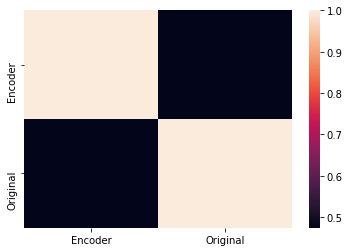

In [ ]:
finalexamQ4 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q4')
finalexamQ4.fillna('', inplace=True)
finalexamQ4.head()
finalanswersQ4 = finalexamQ4.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings4 = model(finalanswersQ4)
finalquery4 = 'With two electrical switches, I can represent 4 situations by connecting those switches in parallel. I can turn on or off either switch and create 4 combinations of binary signal. These 4 combinations can map up to 4 different directions.'
finalquery_vec4 = model([finalquery4])[0]
finaldata4=[]
for sent in finalanswersQ4:
  finalsim4 = cosine(finalquery_vec4, model([sent])[0])
  grade = finalsim4*20
  if grade<0:
    grade = 0
  finaldata4.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim4)

finalstudentno4 =finalexamQ4.iloc[:,0].values.tolist()
finalstno4 = []

for no in finalstudentno4:
  finalstno4.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata4, finalstno4, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades4 = finalexamQ4.iloc[:,4].values.tolist()
finalgradesdf4 = pd.DataFrame({'Encoder':finaldata4,'Original':finaloriginalgrades4})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf4)) :
  print(finalstno4[i],finalgradesdf4.loc[i, "Encoder"], finalgradesdf4.loc[i, "Original"])

print(finalgradesdf4.corr())
sns.heatmap(finalgradesdf4.corr())
r2f4 = r2_score(finaloriginalgrades4,finaldata4)
print("R2: ",r2f4)

**Q5**

Sentence =  It is developed with development and understanding of electricity. Started with Hauksbee's experiments, Volta's volta pile and led the development of Transistor. ; similarity =  0.4865595
Sentence =  Water was added to a cage, it was used like a battery, and the water was electrified, because the electricity was in the water, the surplus power began to accumulate there, thanks to the glass in between, the residual charges could not reach negative charges. But when we put our hand where the flow came, the loads were rising and a little spark came out ; similarity =  0.18746991
Sentence =   ; similarity =  -0.034313764
Sentence =    ; similarity =  -0.034313764
Sentence =  transistor made big impact for technology because it has lower power consumption and lower heat generation. with transistor complex circuits are minimized and with its benefits its been essential parts of circuits.  carbon rods, static electricity found,nions and cations found, stack battery found ...  ; si

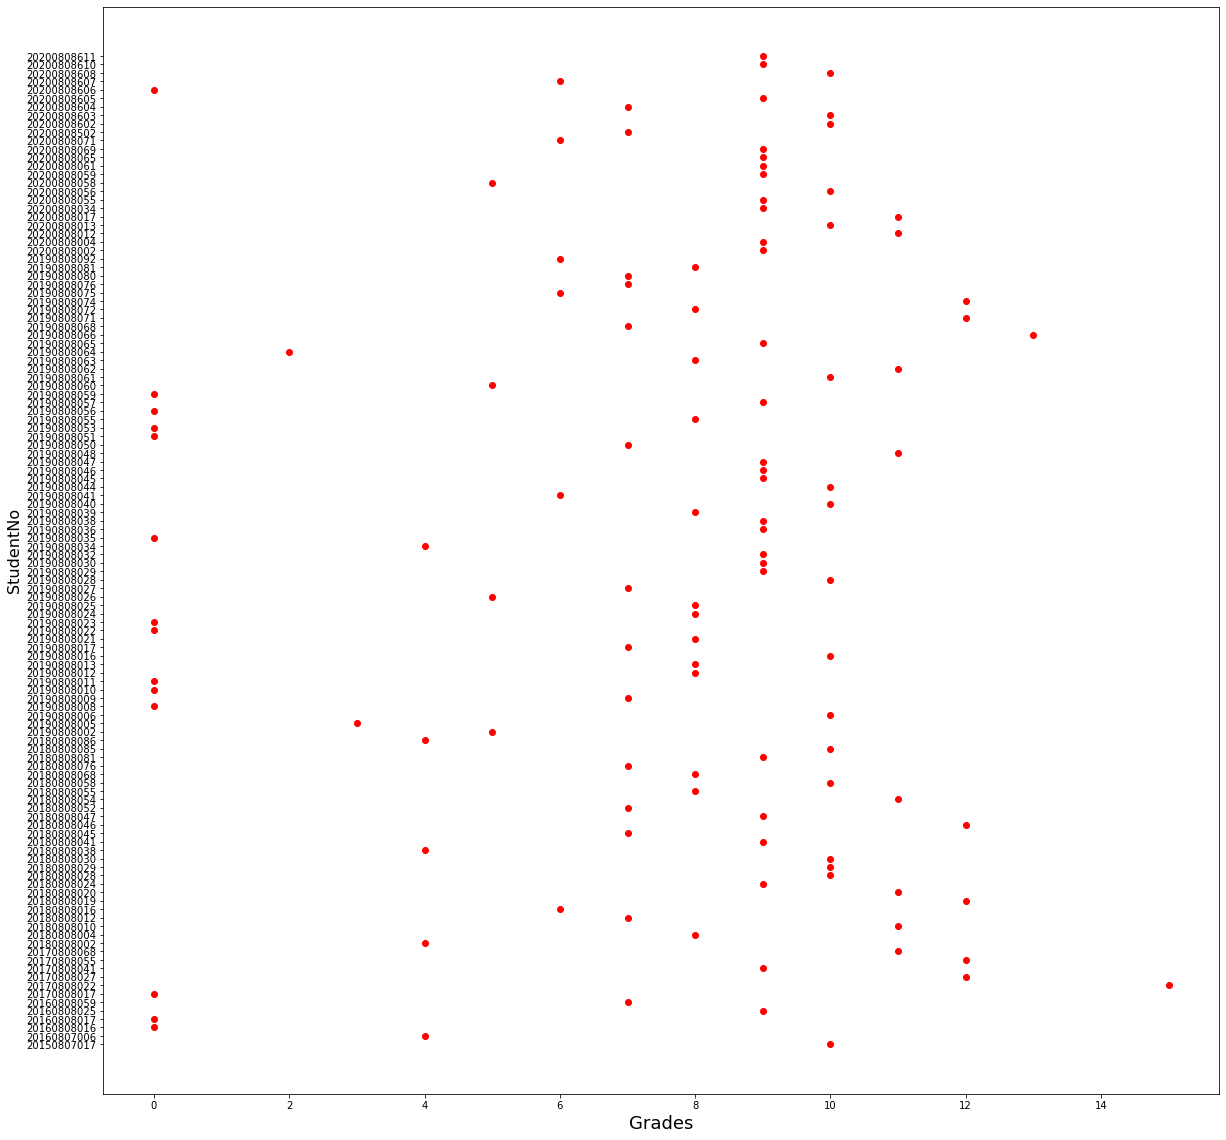

Number:    Encoder:    Original
20150807017 10 0
20160807006 4 0
20160808016 0 0
20160808017 0 0
20160808025 9 0
20160808059 7 0
20170808017 0 0
20170808022 15 20
20170808027 12 18
20170808041 9 16
20170808055 12 18
20170808068 11 20
20180808002 4 0
20180808004 8 8
20180808010 11 16
20180808012 7 8
20180808016 6 18
20180808019 12 10
20180808020 11 8
20180808024 9 8
20180808028 10 0
20180808029 10 16
20180808030 10 0
20180808038 4 8
20180808041 9 16
20180808045 7 0
20180808046 12 10
20180808047 9 16
20180808052 7 16
20180808054 11 8
20180808055 8 0
20180808058 10 0
20180808068 8 10
20180808076 7 16
20180808081 9 16
20180808085 10 18
20180808086 4 0
20190808002 5 8
20190808005 3 0
20190808006 10 18
20190808008 0 0
20190808009 7 8
20190808010 0 0
20190808011 0 0
20190808012 8 0
20190808013 8 8
20190808016 10 0
20190808017 7 8
20190808021 8 0
20190808022 0 0
20190808023 0 0
20190808024 8 16
20190808025 8 8
20190808026 5 0
20190808027 7 16
20190808028 10 8
20190808029 9 16
20190808030 9 0
2

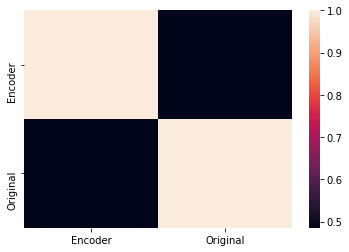

In [ ]:
finalexamQ5 = pd.read_excel("NS-Final_2020.xlsx",sheet_name = 'Q5')
finalexamQ5.fillna('', inplace=True)
finalexamQ5.head()
finalanswersQ5 = finalexamQ5.iloc[:,2].values.tolist()


#print(answersQ1)

finalsentence_embeddings5 = model(finalanswersQ5)
finalquery5 = 'Everything started with the vacuum tubes. Diodes was the simplest of the vacuum tubes which allows transfer of electrons from cathode to anode.Then germanium transistors were developed as semiconductor. With the invention of silicon, silicon based transistors was developed.'
finalquery_vec5 = model([finalquery5])[0]
finaldata5=[]
for sent in finalanswersQ5:
  finalsim5 = cosine(finalquery_vec5, model([sent])[0])
  grade = finalsim5*20
  if grade<0:
    grade = 0
  finaldata5.append(round(grade))
  print("Sentence = ", sent, "; similarity = ", finalsim5)

finalstudentno5 =finalexamQ5.iloc[:,0].values.tolist()
finalstno5 = []

for no in finalstudentno5:
  finalstno5.append(str(no))
#print(answersQ1)


plt.figure(figsize=(20,20))
plt.plot(finaldata5, finalstno5, 'ro')
plt.xlabel('Grades', fontsize=18)
plt.ylabel('StudentNo', fontsize=16)
plt.show()
finaloriginalgrades5 = finalexamQ5.iloc[:,3].values.tolist()
finalgradesdf5 = pd.DataFrame({'Encoder':finaldata5,'Original':finaloriginalgrades5})
print("Number:    Encoder:    Original")
for i in range(len(finalgradesdf5)) :
  print(finalstno5[i],finalgradesdf5.loc[i, "Encoder"], finalgradesdf5.loc[i, "Original"])

print(finalgradesdf5.corr())
sns.heatmap(finalgradesdf5.corr())
r2f5 = r2_score(finaloriginalgrades5,finaldata5)
print("R2: ",r2f5)